<a href="https://colab.research.google.com/github/umeshbudhori/EDA--Telecom-Churn-Analysis/blob/main/EDA_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

**This Notebook is Prepared with Hands on Efforts and Collaboration From our Team Including :**





1.   Rishabh Pandey
2.   Harshit Sachan
3.   ANKIT GUPTA
4.   UMESH CHANDRA







 

**Loading Data and Importing Modules**

In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path ="/content/drive/My Drive/Telecom Churn.csv"

In [ ]:
telecom= pd.read_csv(path)

In [ ]:
 # To look the glimps of the data
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# to look the glimps of the data of bottom 5 rows
telecom.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# shape of dataset with rows and column
print(telecom.shape)

(3333, 20)


# Features of column of the Data:

**STATE:** 51 Unique States name

**Account Length:** Length of The Account

**Area Code:** Code Number of Area having some States

**International Plan :** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:** Total Number of Minutes Spent in Morning

**Total day calls:** Total Number of Calls made in Morning.

**Total day charge:** Total Charge to the Customers in Morning.

**Total eve minutes:** Total Number of Minutes Spent in Evening

**Total eve calls:** Total Number of Calls made r in Evening.

**Total eve charge:** Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes Spent in the Night.

**Total night calls:** Total Number of Calls made in Night.

**Total night charge:** Total Charge to the Customers in Night.

**Customer service calls:** Number of customer service calls made by customer

**Churn:** Customer Churn, True means churned customer, False means retained customer


In [ ]:
#the data types of all the columns
telecom.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
#checking the details about the dataset
telecom.info()

## **There is 3333 entries and no null values are present**

In [ ]:
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**Out of the total 3333 customers, 2850 customers are retained and the rest 483 are churning the telecom service.**

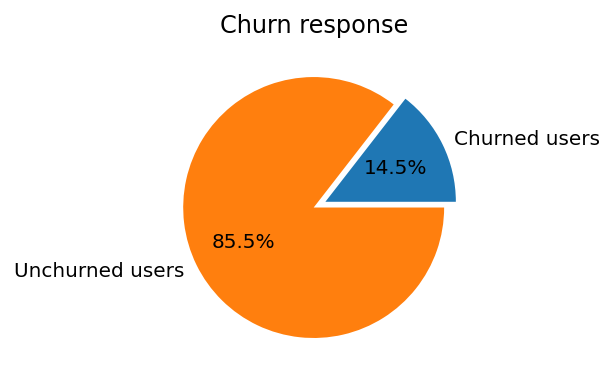

In [ ]:
Percent_churned_users = round((telecom['Churn'].mean() * 100),3)
Percent_unchurned_users = round((100 - Percent_churned_users),3)
x = [Percent_churned_users, Percent_unchurned_users]
labels = ['Churned users', 'Unchurned users']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Churn response')
plt.show()

From the table above, it can be seen that customers talk less during the day compared to the evening and night time.

The average number of calls during the day, evening and night is almost the same.

Apart from having a limited number of minutes to speak during the day, the costs incurred by the customer are higher compared to the evening and night talk minutes.

It can also be visualized in the structure shown below

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

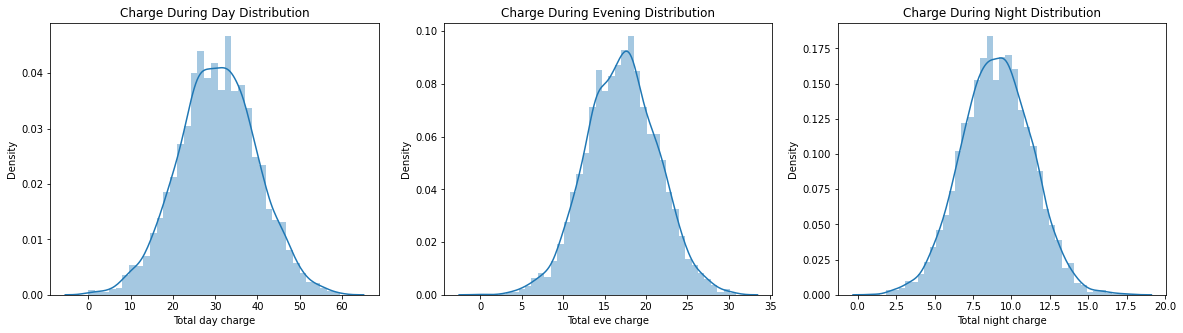

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Charge During Day Distribution')
sns.distplot(telecom['Total day charge'])

plt.subplot(1,3,2)
plt.title('Charge During Evening Distribution')           
sns.distplot(telecom['Total eve charge'])


plt.subplot(1,3,3)
plt.title('Charge During Night Distribution')
sns.distplot(telecom['Total night charge'])
plt.show()

In [ ]:
# unique elements of the dataset
telecom.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# Checking Duplicate Values
len(telecom[telecom.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

1 boolean data type i.e churn

8 float data type,

8integer data type,

3 object data type i.e categorical value are there.

There are no missing value present so no need to do the missing value imputation,
And also there are no duplicate value present.

In [ ]:
#Printing the count of true and false in 'churn' feature#
print(telecom.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [ ]:
#sorting the dataset
telecom.sort_values

<bound method DataFrame.sort_values of      State  Account length  ...  Customer service calls  Churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[3333 rows x 20 columns]>

In [ ]:
#evaluating the mean of all entities
telecom['Churn'].mean()

0.14491449144914492

In [ ]:
#evaluating the mean of churned entities
telecom[telecom['Churn'] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
#array of unique features of churns
telecom["Churn"].unique()

array([False,  True])

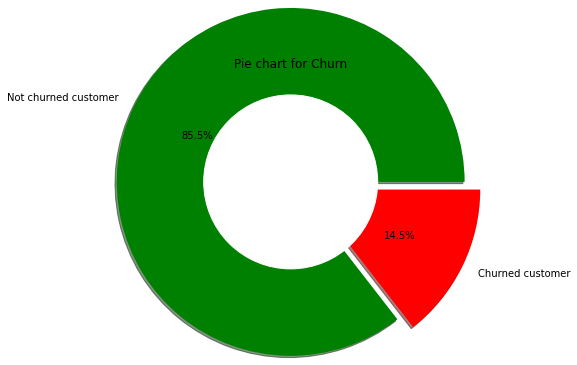

In [ ]:
data = telecom['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['green' ,'red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Pie chart for Churn')
plt.show()

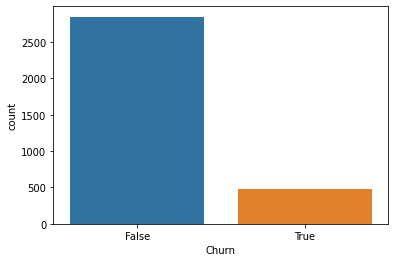

In [ ]:
# See churn by using countplot
sns.countplot(x=telecom.Churn)

**Above we get that 15% of customers have churned.**

In [ ]:
#the unique value of sate column
telecom['State'].nunique()

51

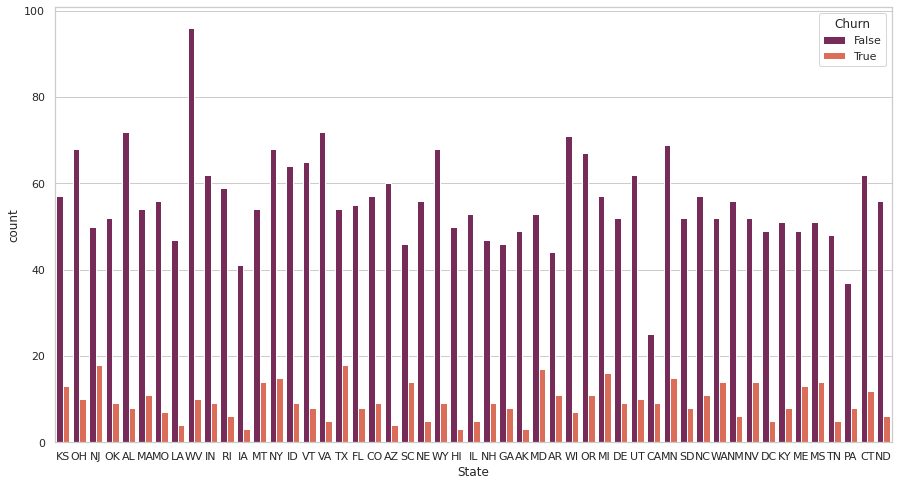

In [ ]:
#Showing the Comparison between churn and the state column
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=telecom, palette ="rocket")
plt.show()

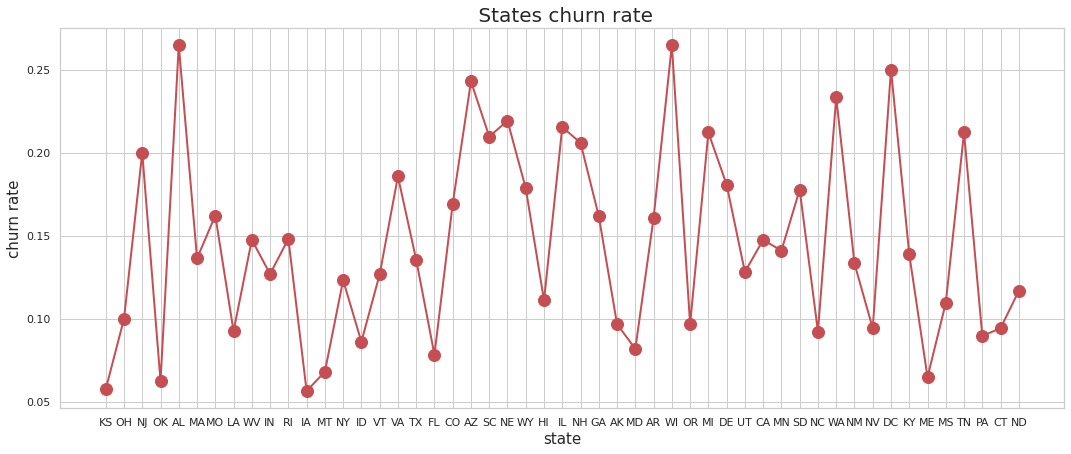

In [ ]:
gt1=telecom['State'].unique()
gt2=telecom.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(gt1,gt2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15  )
plt.ylabel('churn rate', fontsize = 15)
plt.show()

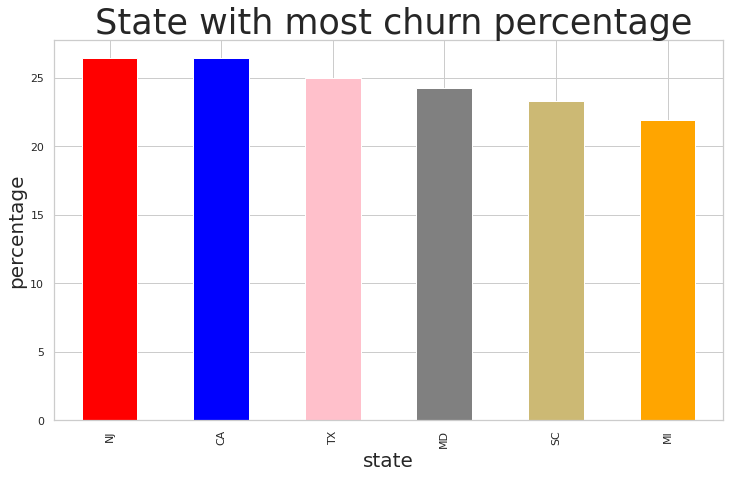

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((telecom.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['red','blue','pink','grey','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 35)
plt.xlabel('state', fontsize = 20)
plt.ylabel('percentage', fontsize = 20)
plt.show()

In [ ]:
#churn vs state in percentage
State_data = pd.crosstab(telecom["State"],telecom["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [ ]:
# Arranging the above list in ascending order
#showing the most churn state of top 10 rows
telecom.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

There are 51 unique state with different churn rate.

these states ( CA, NJ, TX, MD, SC, MI) are those states which have higher rate of churned.

In [ ]:
# Area code vs Churn in percentage
Area_code_data = pd.crosstab(telecom["Area code"],telecom["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


VOICE MAIL PLAN ANALYSIS

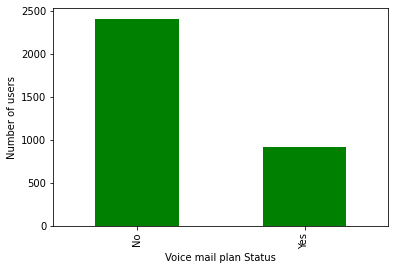

In [ ]:
# VOICE MAIL PLAN ANALYSIS:
voice_plan = telecom['Voice mail plan'].value_counts()
voice_plan
voice_plan.plot(kind = 'bar',color = 'g')
plt.xlabel('Voice mail plan Status')
plt.ylabel('Number of users')
plt.rcParams['figure.figsize'] = (10,5)

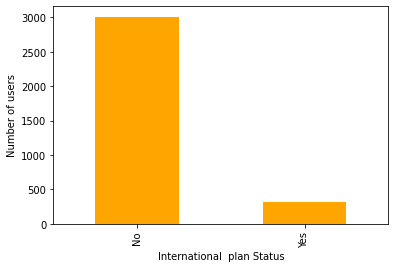

In [ ]:
# INTERNATIONAL PLAN ANALYSIS:
voice_plan = telecom['International plan'].value_counts()
voice_plan
voice_plan.plot(kind = 'bar',color ='orange')
plt.xlabel('International  plan Status')
plt.ylabel('Number of users')
plt.rcParams['figure.figsize'] = (10,5)

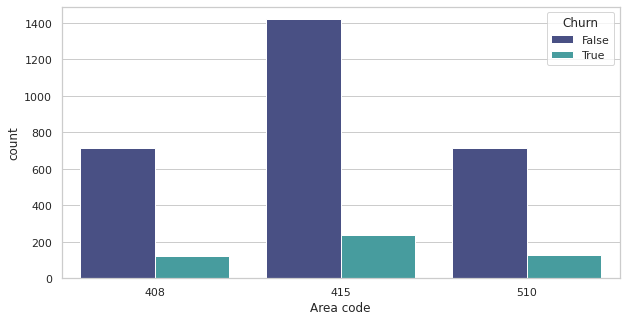

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Area code', hue="Churn", data=telecom, palette = "mako")
plt.show()

**from the above Data, we get there is no relationship between "area code" and "churn".**

In [ ]:
#Separating churn and non churn customers
churn    = telecom[telecom["Churn"] == bool(True)]
not_churn = telecom[telecom["Churn"] == bool(False)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


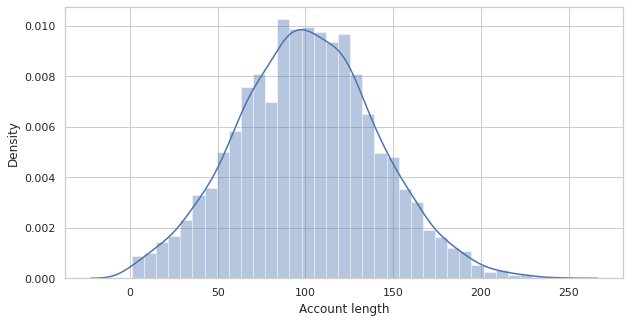

In [ ]:
#Account length vs Churn
sns.distplot(telecom['Account length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

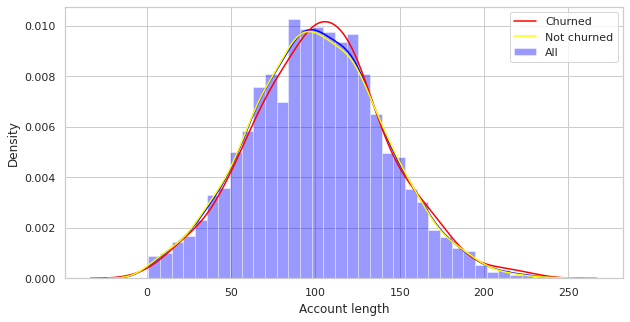

In [ ]:
# churned account length vs not churned account length 
sns.distplot(telecom['Account length'],color = "blue",label="All")
sns.distplot(churn['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn['Account length'],color = "yellow",hist= False,label="Not churned")
plt.legend()

**from the above Data, we found there is not a great significance of "account length" on "churn"**

In [ ]:
#counting the value of yes and no
telecom["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#the unique data of "International plan"
telecom['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

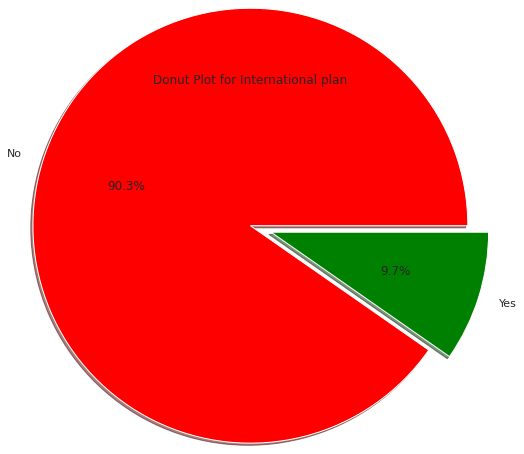

In [ ]:
#the Donut Plot to analyze International Plan
data = telecom['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['red' ,'green'])
circle = plt.Circle( (0,0),0, color='red')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

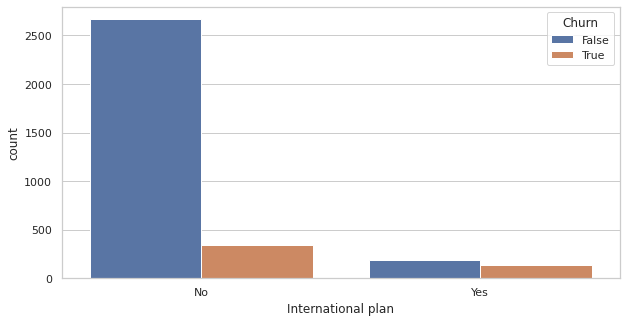

In [ ]:
sns.countplot(x='International plan',hue="Churn",data=telecom)

From the above data,

1-3010 customers- Dont have a international plan.

2-323 customers- have a international plan.

3-we conclude that 42.4% people churned among the international plan customers

4-11.4% people churned are among those who doesnt have the international plan

we analyse that those who have international plan have high chaunce to be a churned customer may be due to connectivity issue or high charges.

In [ ]:
#the data of 'Number vmail messages'
telecom['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
#counting the value of the data of 'Number vmail messages'
telecom['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
#describing the 'Number vmail messages'
telecom['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


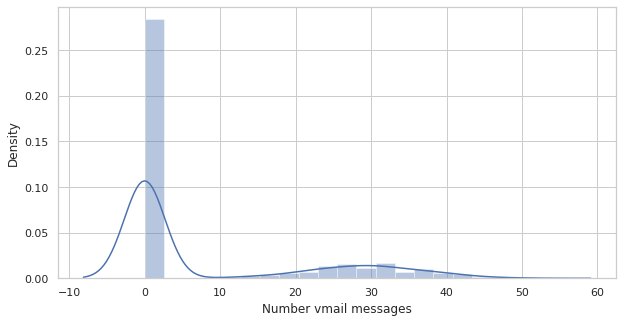

In [ ]:
#displot diagram
sns.distplot(telecom['Number vmail messages'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 124416x82944 with 0 Axes>

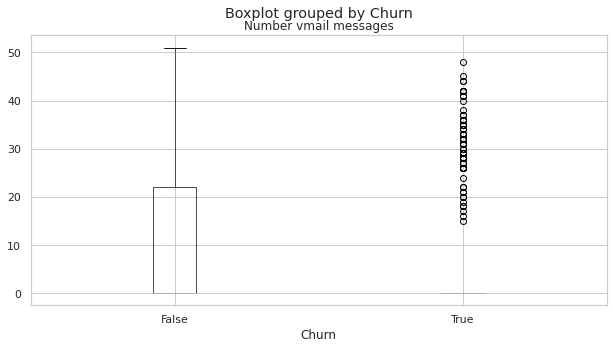

In [ ]:
#boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(1728, 1152)) 
telecom.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=500, fontweight='bold')
plt.show()

From the above data, we found that when there are more than 20 voice-mail messages then there is a churn.
To solve this issue we have to improve the call quality

In [ ]:
#the unique value of the "Voice mail plan" column
telecom["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#the unique value of the "Voice mail plan" column
telecom["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

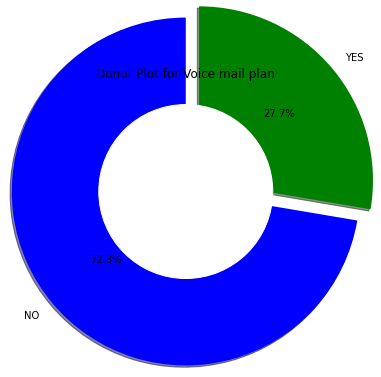

In [ ]:
#the Donut Plot to analyze Voice mail plan
data = telecom['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['blue','green'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

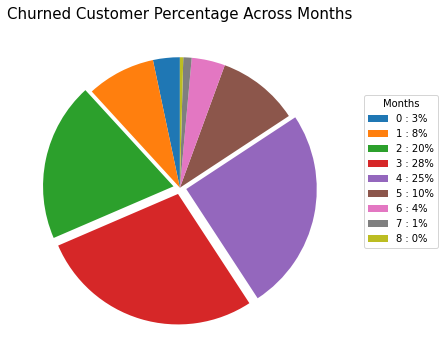

In [ ]:
#Splitting the dataset between churned customers and non-churned customers
telecom_churned = telecom[telecom['Churn'] == True]
telecom_unchurned = telecom[telecom['Churn'] == False]

# Adding column 'Months' to classify data into months
telecom_churned = telecom_churned.assign(Months = lambda x: (x['Account length'] //28))
telecom_unchurned = telecom_unchurned.assign(Months = lambda x: (x['Account length'] //28))

# Doing monthly analysis for both datasets
monthly_analysis_churned = telecom_churned.groupby('Months')['Months'].describe()
monthly_analysis_unchurned = telecom_unchurned.groupby('Months')['Months'].describe()

# Distribution of customers churned out over months
monthly_analysis_churned.reset_index(inplace=True)
plt.rcParams['figure.figsize'] = (10, 6)
monthly_analysis_churned = monthly_analysis_churned.assign(Churned_customers_percentage = lambda x: (x['count'] /sum(monthly_analysis_churned['count']) * 100))
list_of_percentages = list(monthly_analysis_churned['Churned_customers_percentage'].values)

# Adding new labels to show percentage
zipped_dict = dict(zip([0,1,2,3,4,5,6,7,8],list_of_percentages))
new_labels = []
for data in zipped_dict.items():
  new_labels.append(str(data[0]) + ' : ' + str(round(data[1])) + '%')
labels=new_labels
myexplode = [0,0,0.05,0.05,0.05,0,0,0,0]
plt.pie(list_of_percentages,explode=myexplode,startangle = 90)
plt.legend(labels, title='Months', bbox_to_anchor = (1.05, 0.8))
plt.title('Churned Customer Percentage Across Months',fontsize=15)
plt.show()

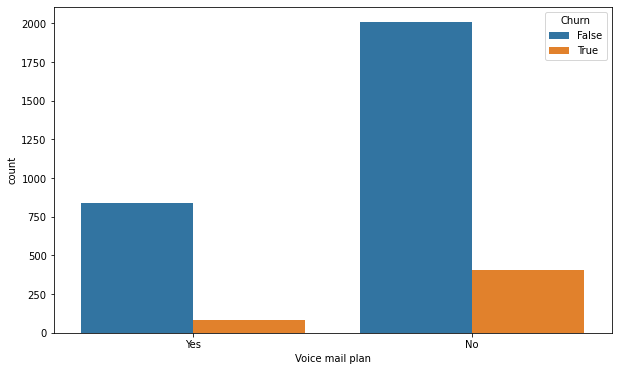

In [ ]:
#Analysing by using countplot
sns.countplot(x='Voice mail plan',hue="Churn",data = telecom)

There is no significance of voice mail plan on churn. so, lets see other significant factors on which churn is depend.

In [ ]:
telecom['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
Customer_service_calls_data = pd.crosstab(telecom['Customer service calls'],telecom["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


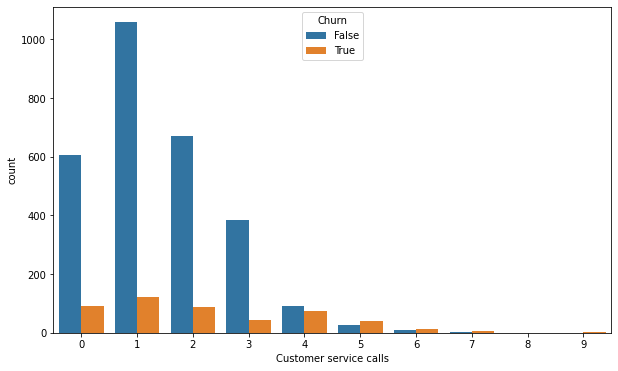

In [ ]:
sns.countplot(x='Customer service calls',hue="Churn",data = telecom)

In [ ]:
print(telecom.groupby(["Churn"])['Total day calls'].mean())

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64


In [ ]:
print(telecom.groupby(["Churn"])['Total day minutes'].mean())

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64


In [ ]:
print(telecom.groupby(["Churn"])['Total day charge'].mean())

Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


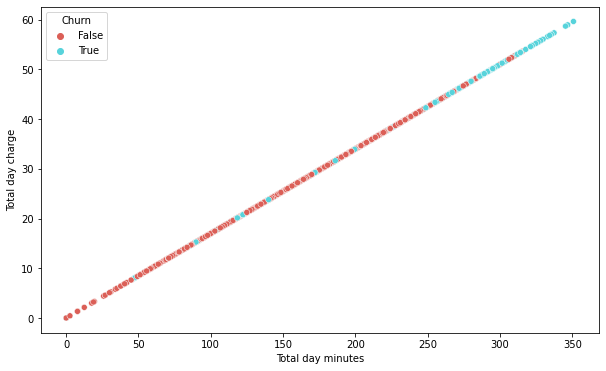

In [ ]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=telecom,palette='hls')

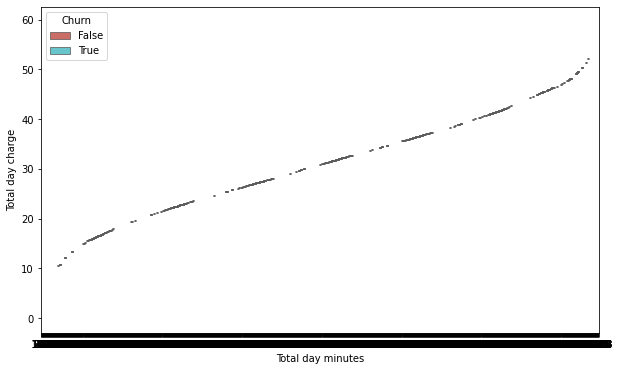

In [ ]:
sns.boxplot(x="Total day minutes", y="Total day charge", hue="Churn", data=telecom,palette='hls')

In [ ]:
print(telecom.groupby(["Churn"])['Total eve calls'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64


In [ ]:
print(telecom.groupby(["Churn"])['Total eve minutes'].mean())

Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64


In [ ]:
print(telecom.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


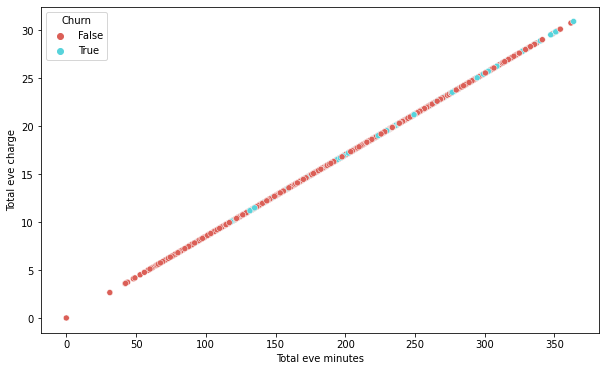

In [ ]:
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=telecom,palette='hls')

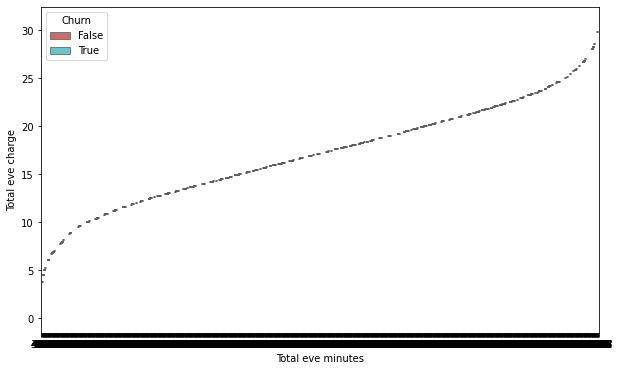

In [ ]:
sns.boxplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=telecom,palette='hls')

In [ ]:
print(telecom.groupby(["Churn"])['Total night calls'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64


In [ ]:
print(telecom.groupby(["Churn"])['Total night minutes'].mean())

Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(telecom.groupby(["Churn"])['Total night charge'].mean())

Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


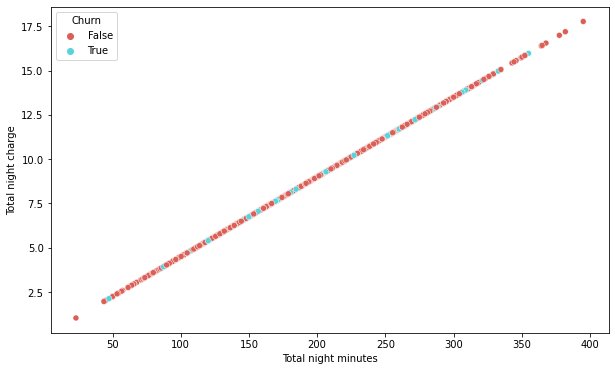

In [ ]:
#show the relation using scatter plot
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data= telecom,palette='hls')

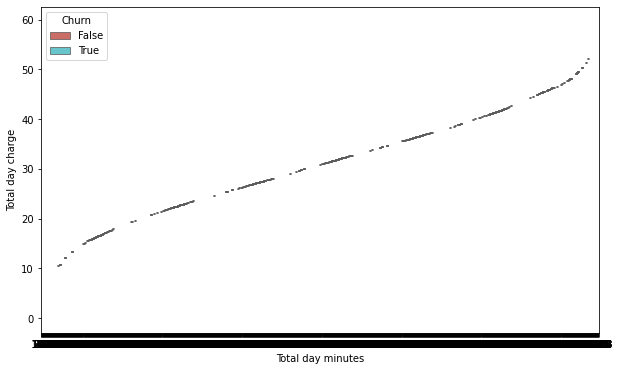

In [ ]:
#show the relation using box plot plot
sns.boxplot(x="Total night minutes", y="Total night charge", hue="Churn", data=telecom,palette='hls')

In [ ]:
#Print the mean value of churned and not churned customer 
print(telecom.groupby(["Churn"])['Total eve calls'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64


In [ ]:
day_charge_perm = telecom['Total day charge'].mean()/telecom['Total day minutes'].mean()
eve_charge_perm = telecom['Total eve charge'].mean()/telecom['Total eve minutes'].mean()
night_charge_perm = telecom['Total night charge'].mean()/telecom['Total night minutes'].mean()
int_charge_perm= telecom['Total intl charge'].mean()/telecom['Total intl minutes'].mean()

In [ ]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.1700030073913066, 0.08500104871485774, 0.04500041448440013, 0.2700500279887098]


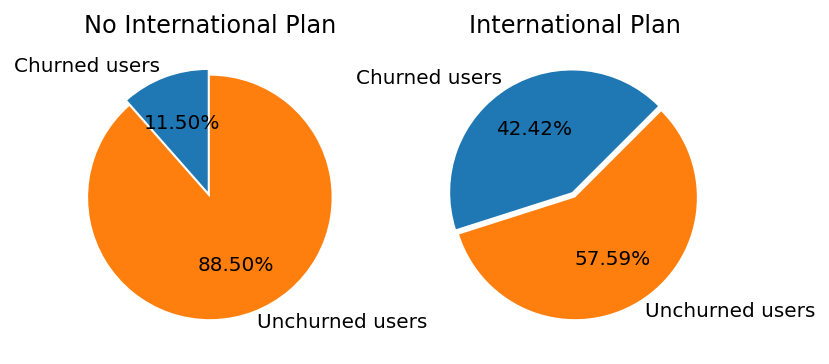

In [ ]:
# Using groupby method to group international plan users and non-users and then further classifying on their churn status.
Intl_churn_rate = telecom.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
churn_perct_with_no_Intl_plan = round((Intl_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_Intl_plan = 100 - churn_perct_with_no_Intl_plan
churn_perct_with_Intl_plan = round((Intl_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_Intl_plan = 100 - churn_perct_with_Intl_plan

# Getting a list of percentages with and without international plan on basis of churn status.
x1 = [churn_perct_with_no_Intl_plan, unchurn_perct_with_no_Intl_plan]
x2 = [churn_perct_with_Intl_plan, unchurn_perct_with_Intl_plan]

# Plotting a pie-chart
labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]
fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.2f%%', startangle=90 )
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.2f%%', startangle=45)
ax1.set_title('No International Plan')
ax2.set_title('International Plan')
plt.show()

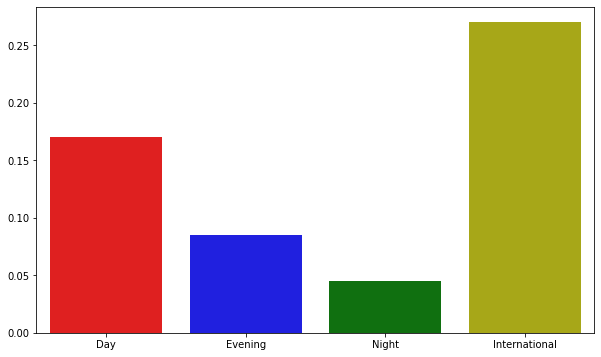

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm],palette = ['r','b','g','y'])

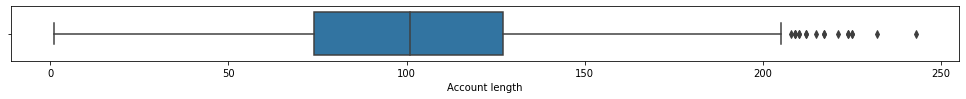

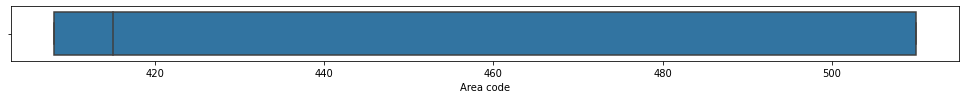

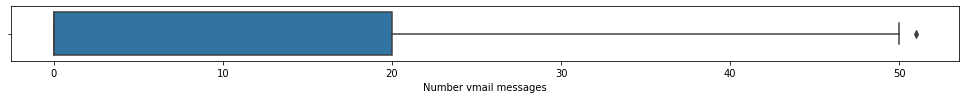

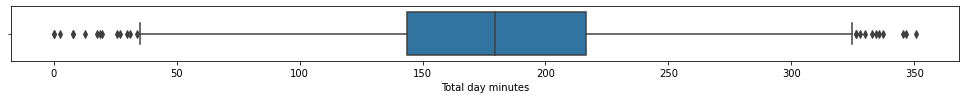

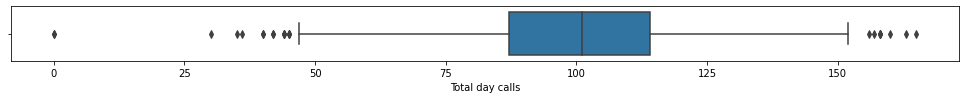

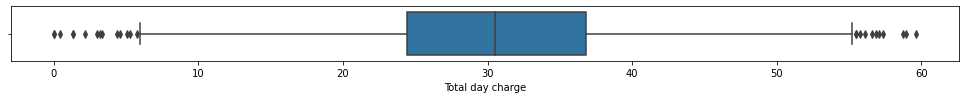

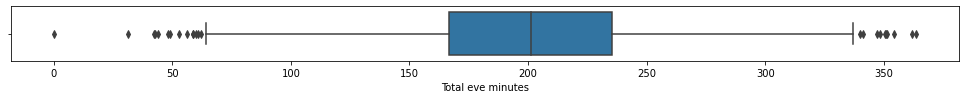

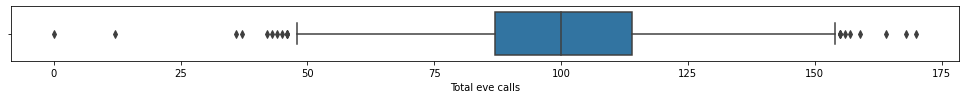

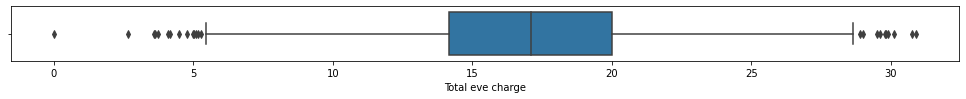

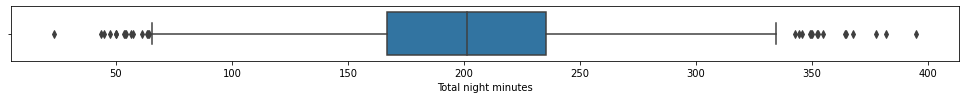

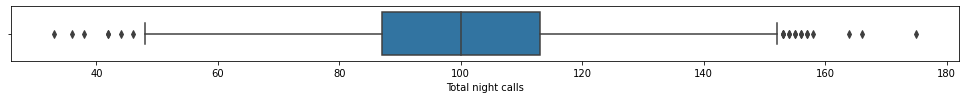

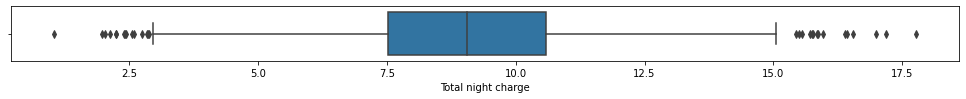

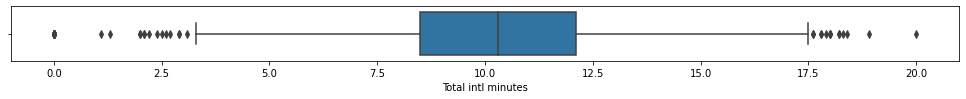

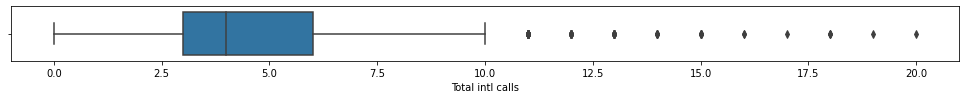

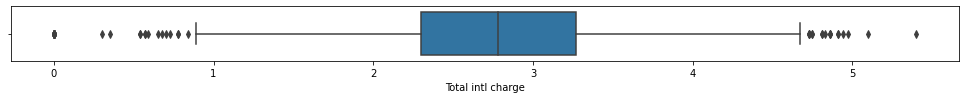

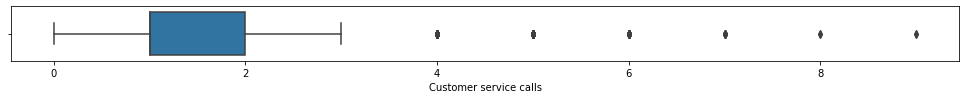

In [ ]:
df1=telecom.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expl

<Figure size 1224x72 with 0 Axes>

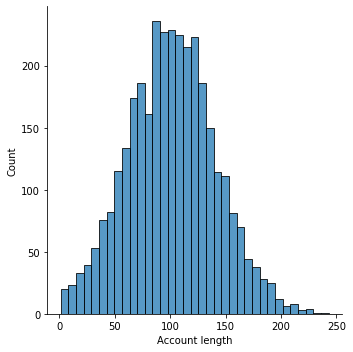

<Figure size 1224x72 with 0 Axes>

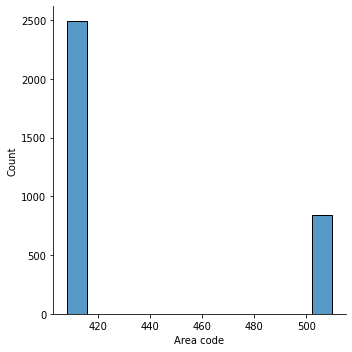

<Figure size 1224x72 with 0 Axes>

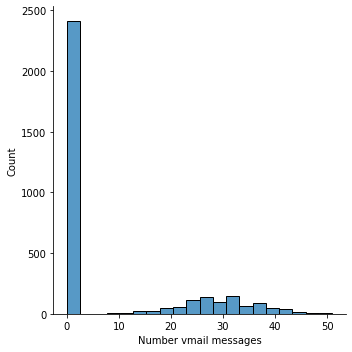

<Figure size 1224x72 with 0 Axes>

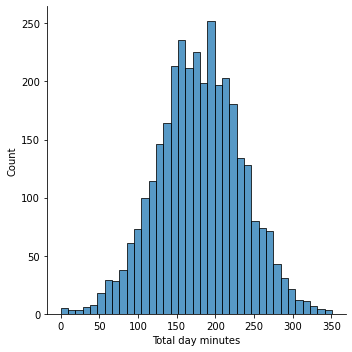

<Figure size 1224x72 with 0 Axes>

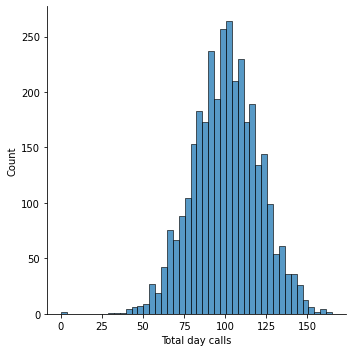

<Figure size 1224x72 with 0 Axes>

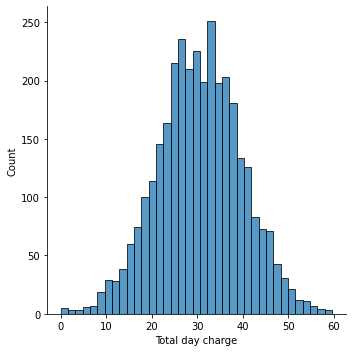

<Figure size 1224x72 with 0 Axes>

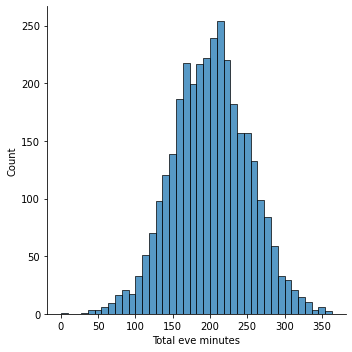

<Figure size 1224x72 with 0 Axes>

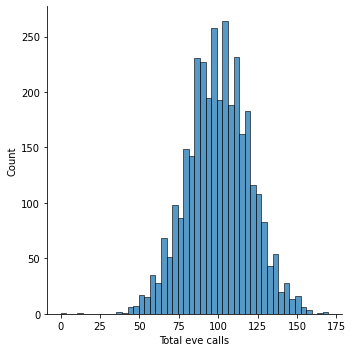

<Figure size 1224x72 with 0 Axes>

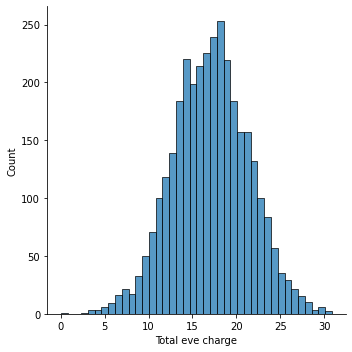

<Figure size 1224x72 with 0 Axes>

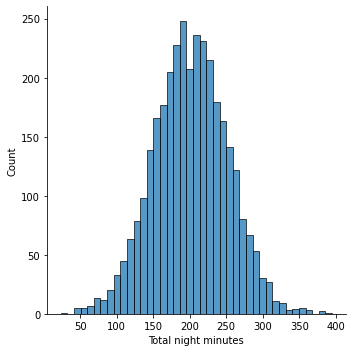

<Figure size 1224x72 with 0 Axes>

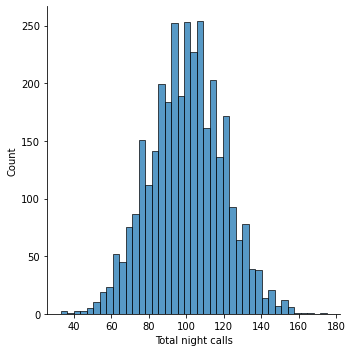

<Figure size 1224x72 with 0 Axes>

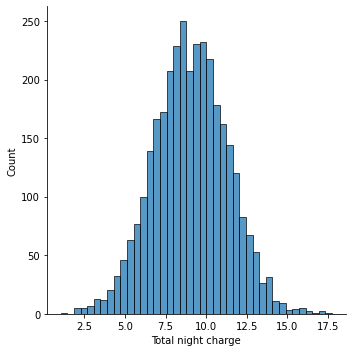

<Figure size 1224x72 with 0 Axes>

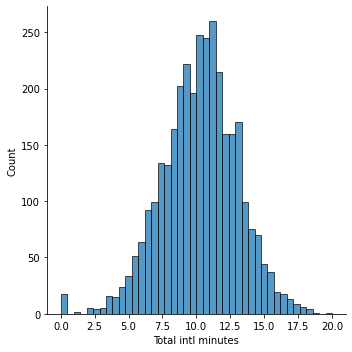

<Figure size 1224x72 with 0 Axes>

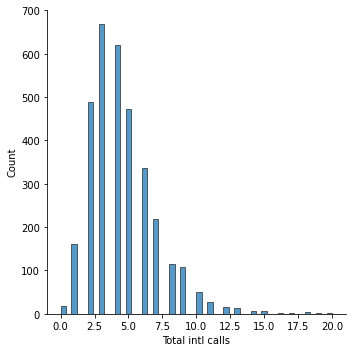

<Figure size 1224x72 with 0 Axes>

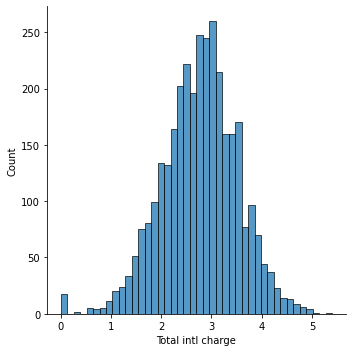

<Figure size 1224x72 with 0 Axes>

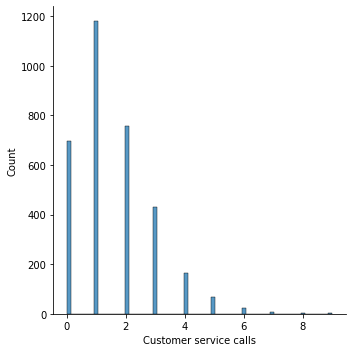

In [ ]:
df1=telecom.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

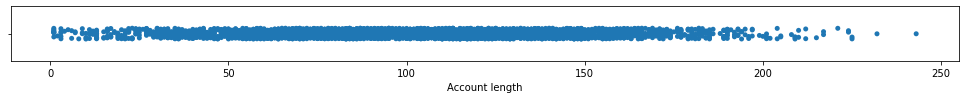

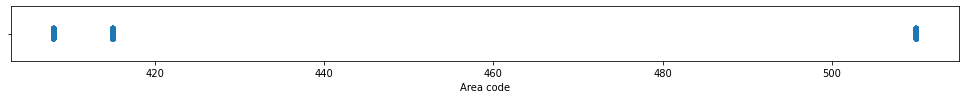

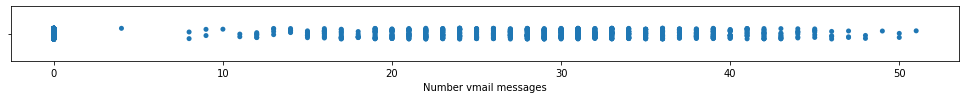

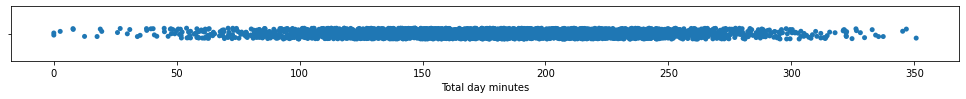

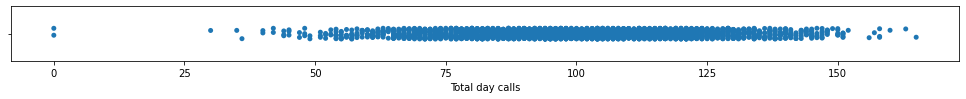

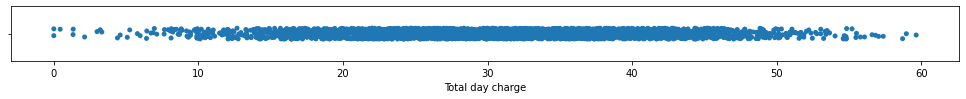

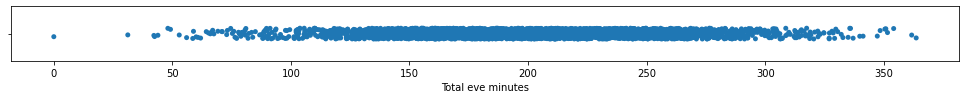

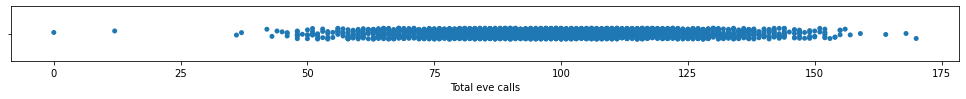

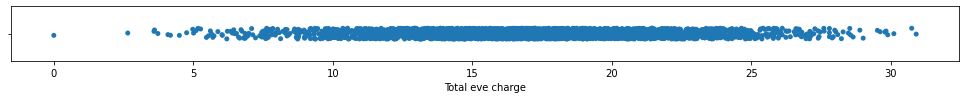

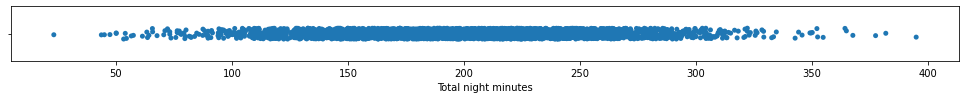

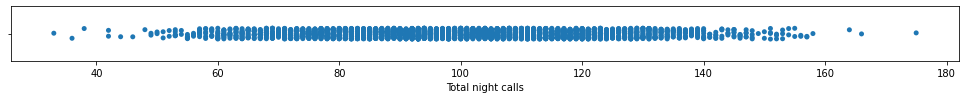

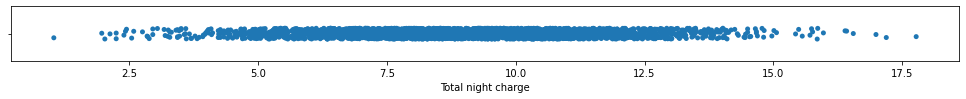

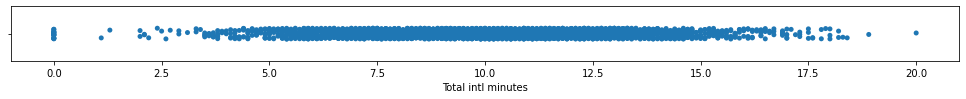

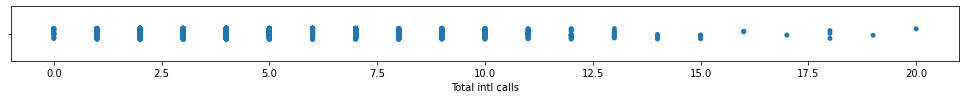

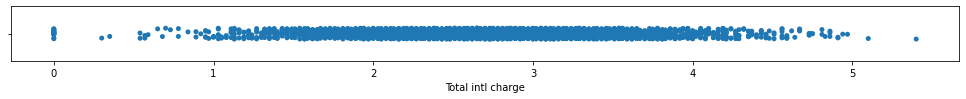

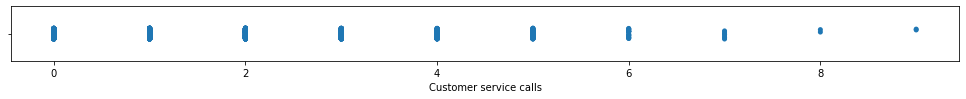

In [ ]:
df1=telecom.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

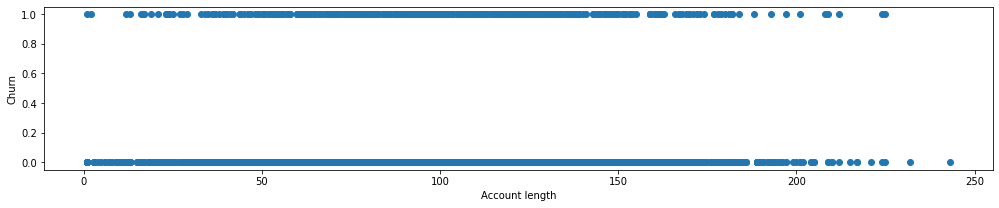

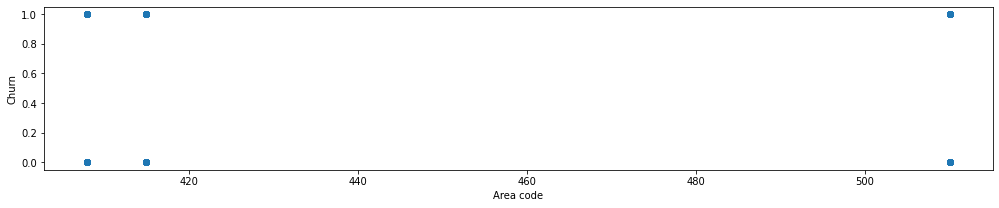

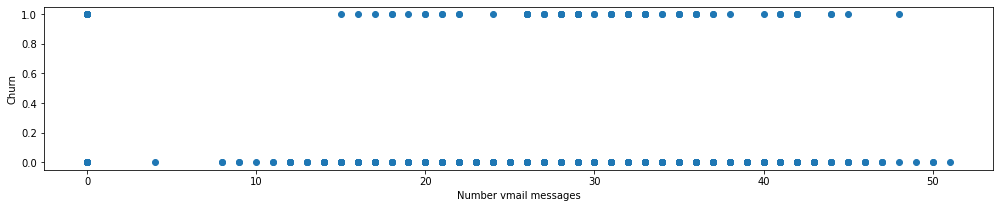

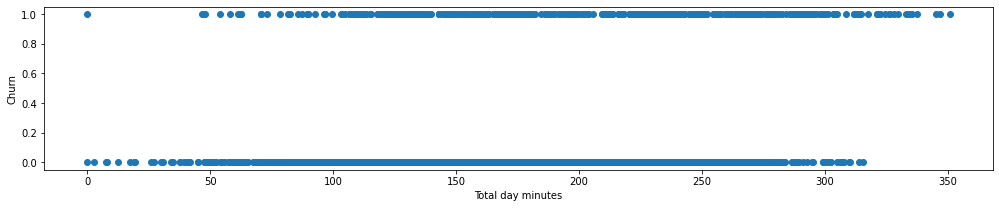

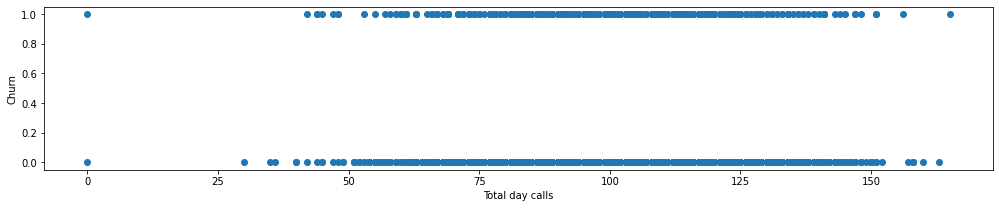

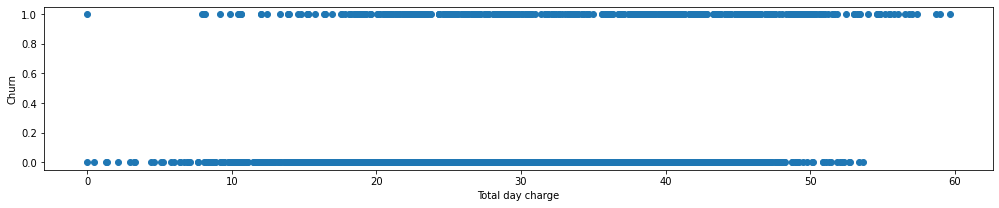

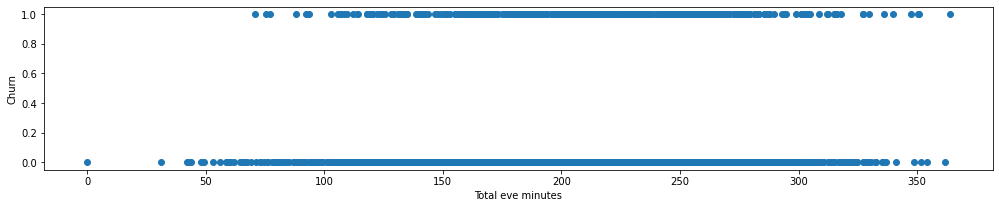

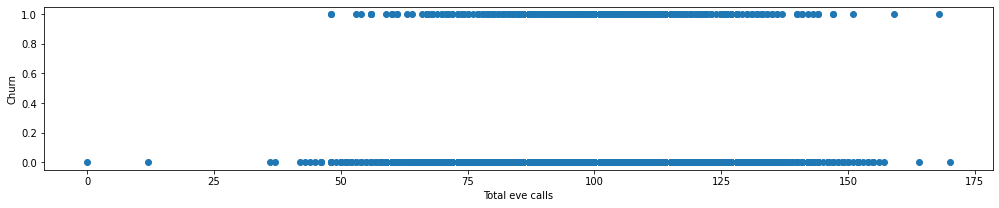

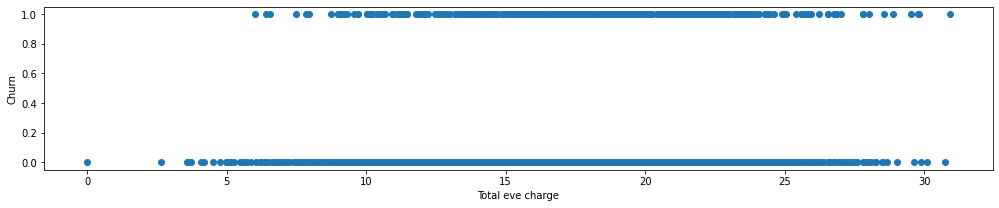

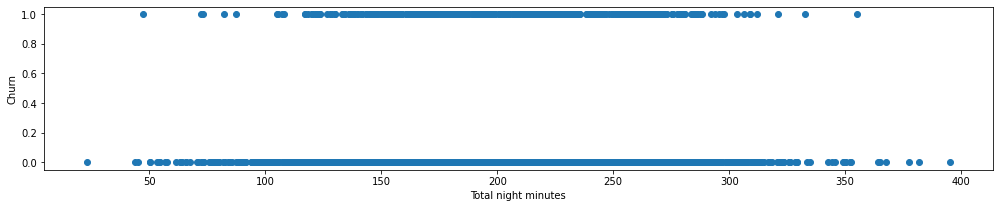

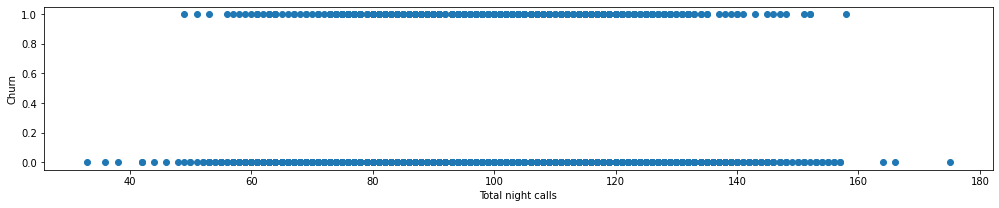

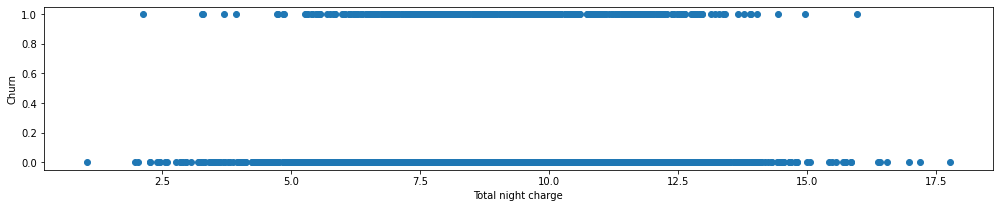

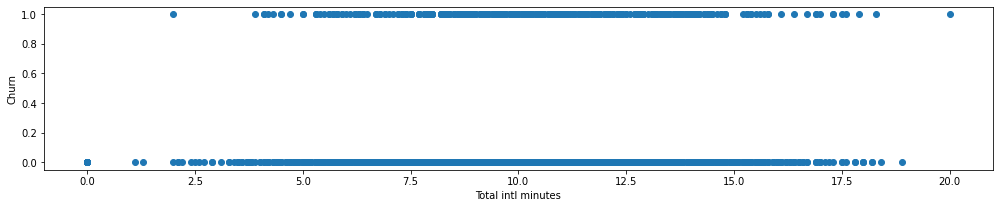

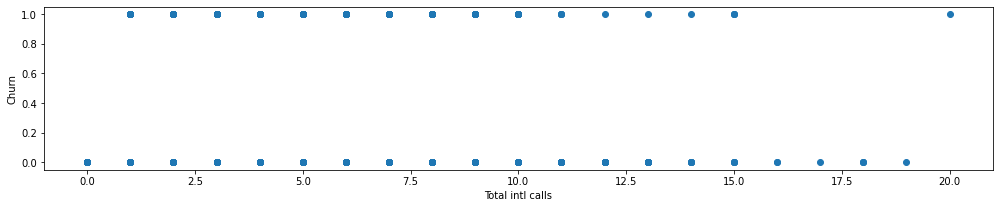

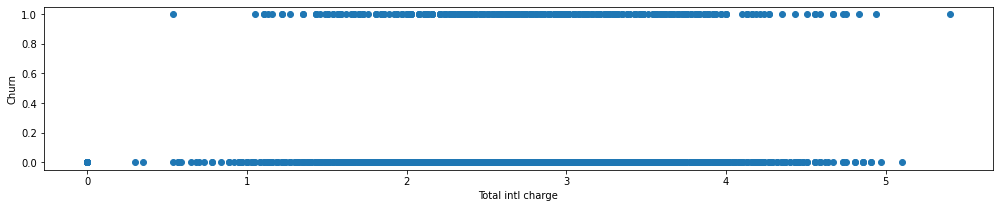

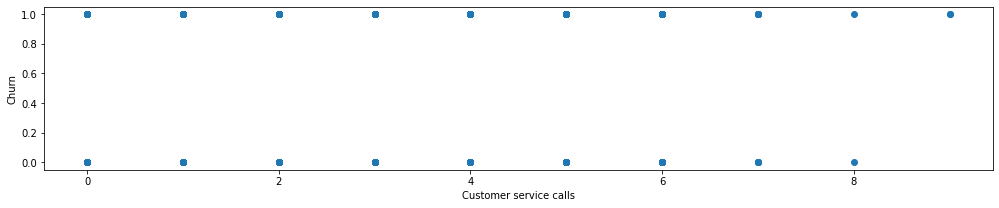

In [ ]:
df2= telecom.describe().columns
for col in df2:
  fig=plt.figure(figsize=(17,3))
  ax=fig.gca()
  feature=telecom[col]
  label=telecom['Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Churn')
plt.show()

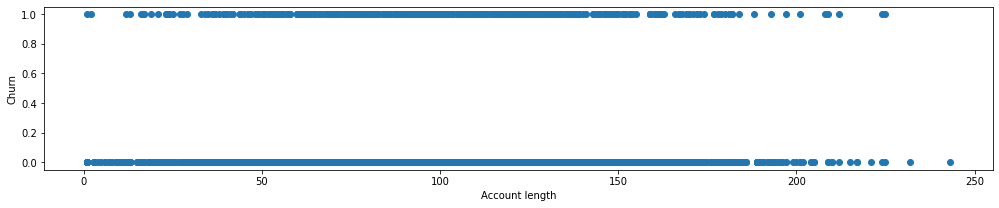

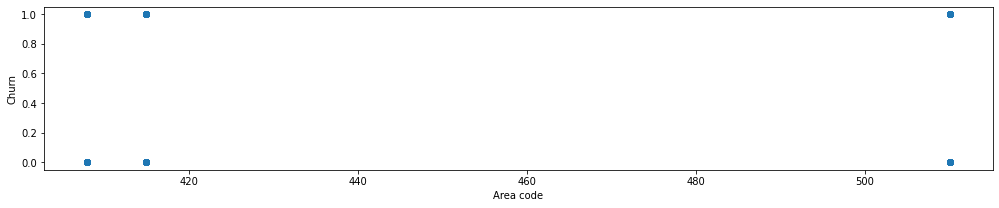

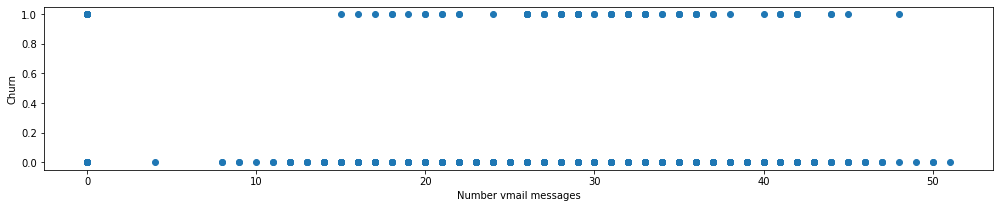

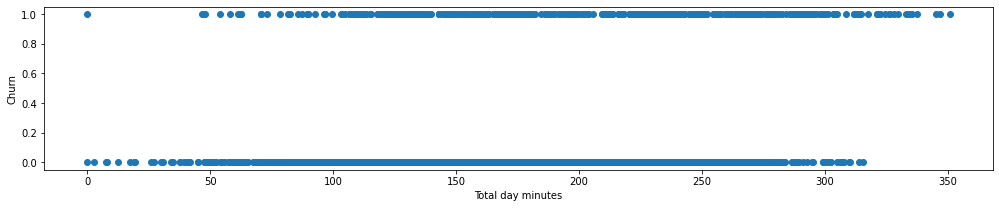

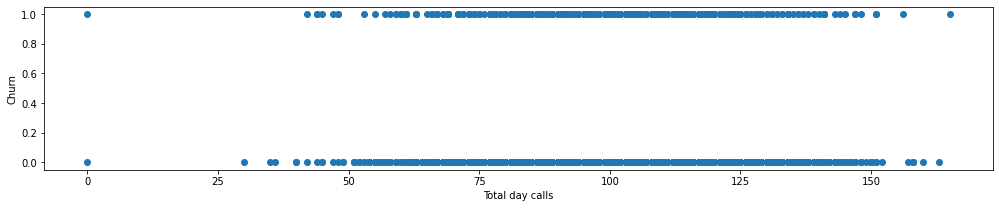

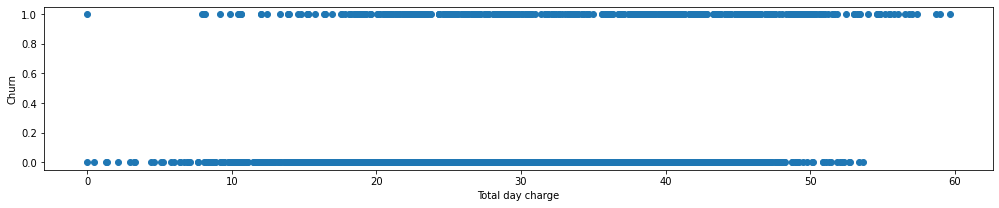

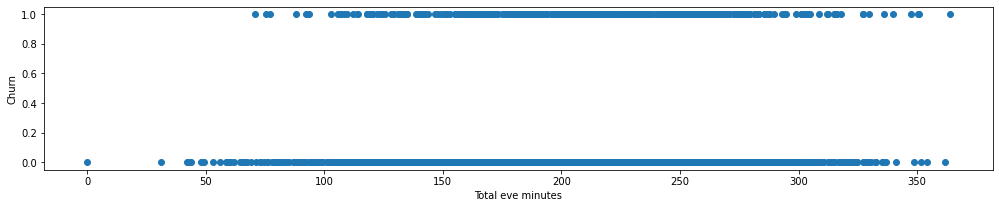

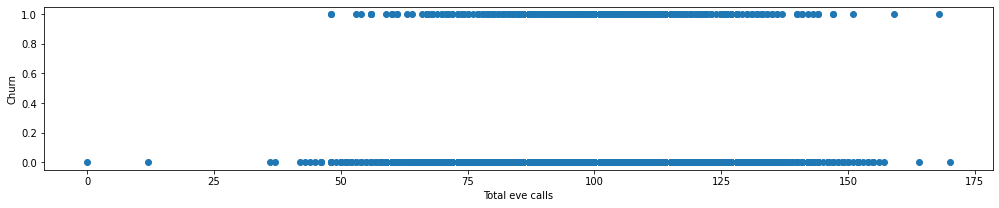

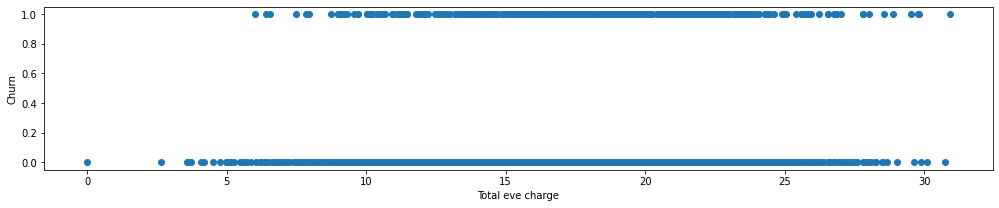

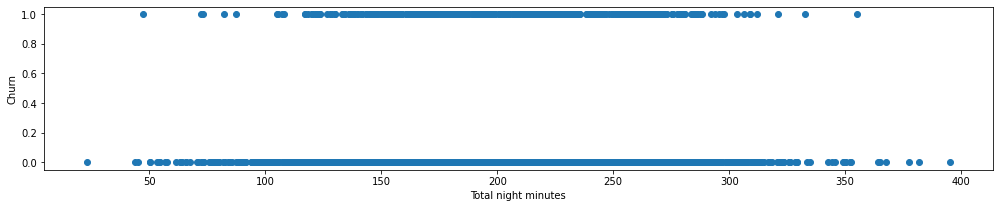

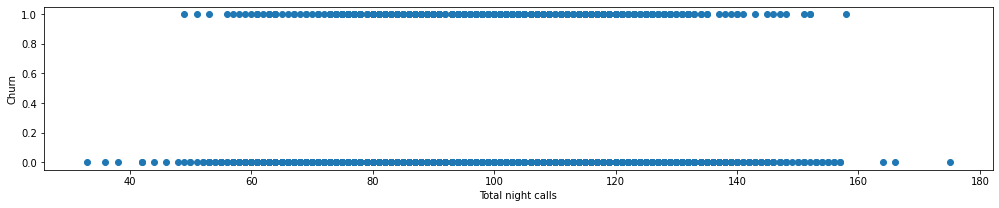

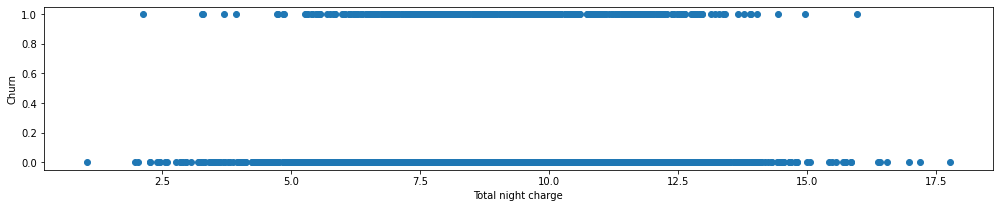

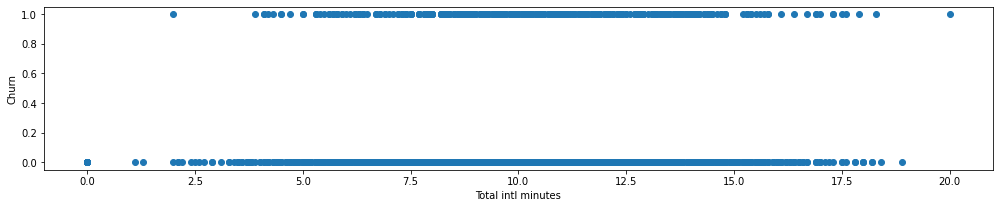

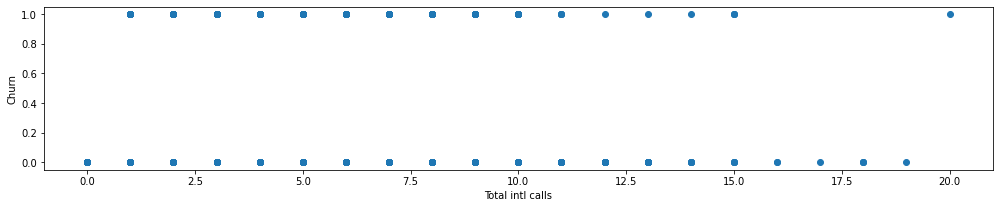

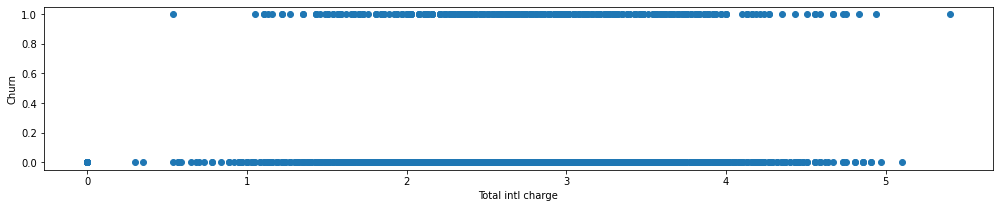

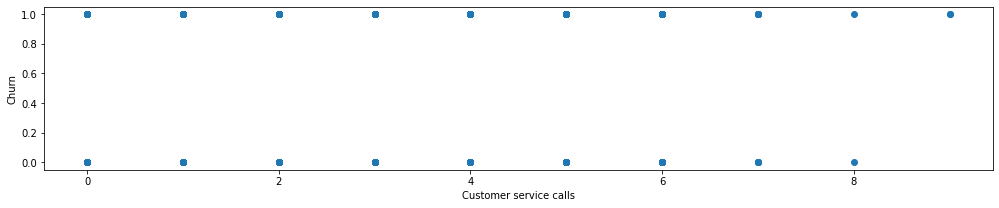

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

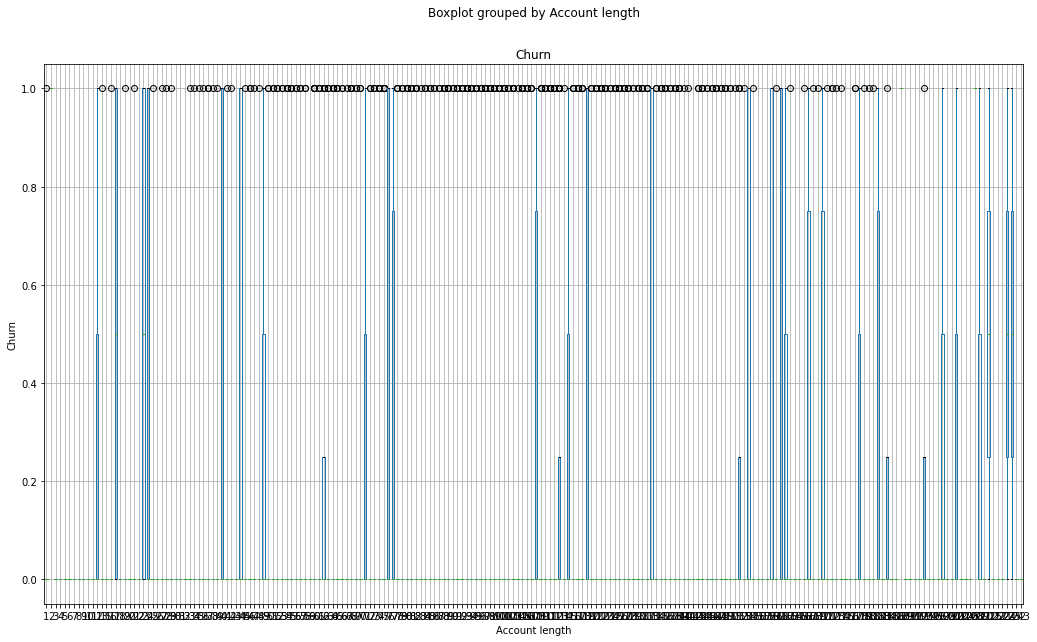

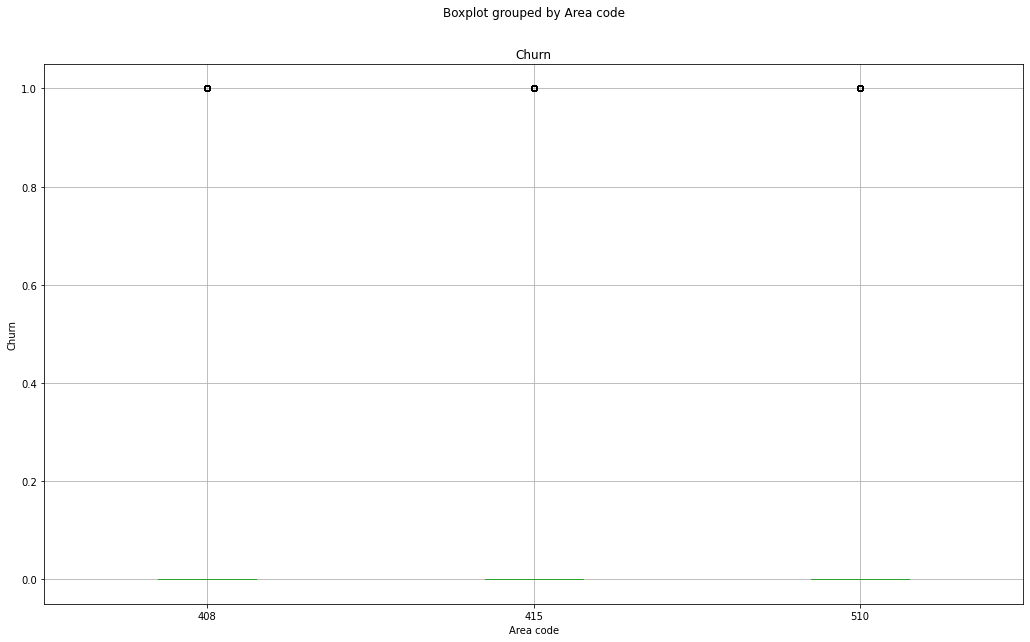

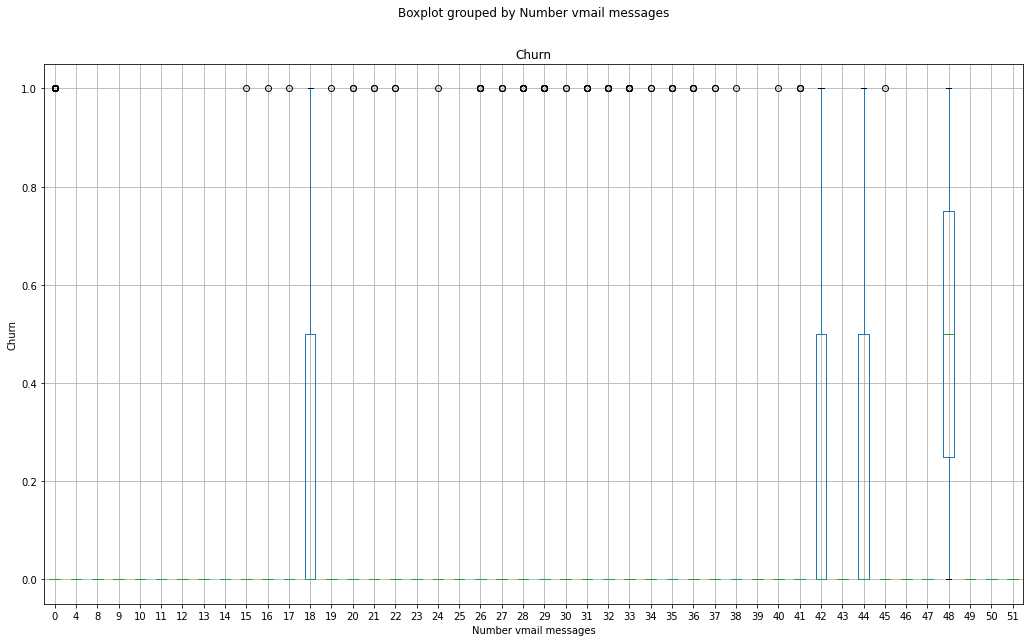

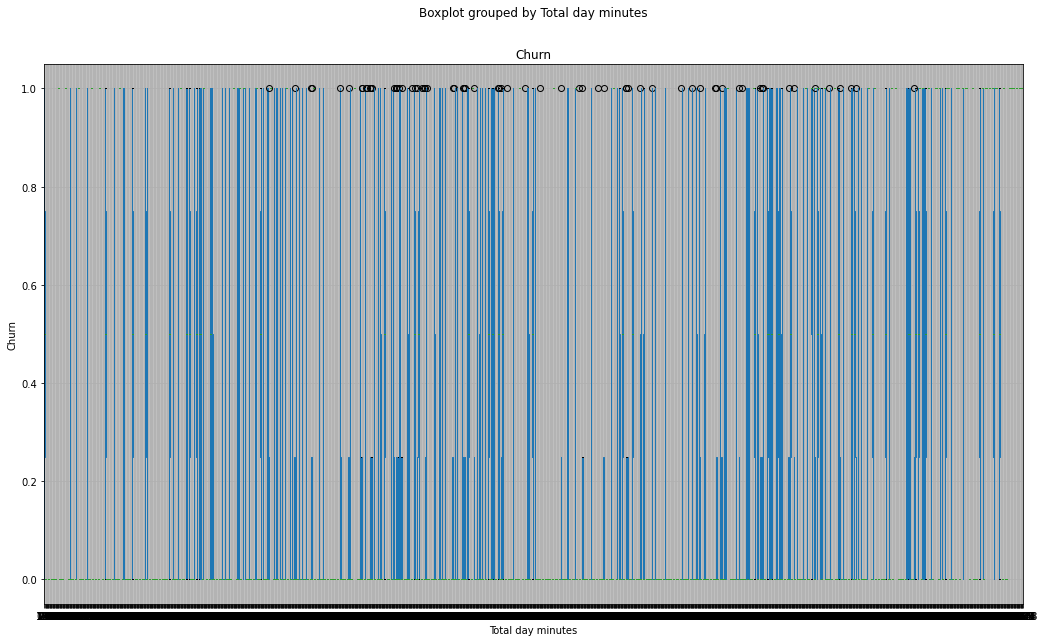

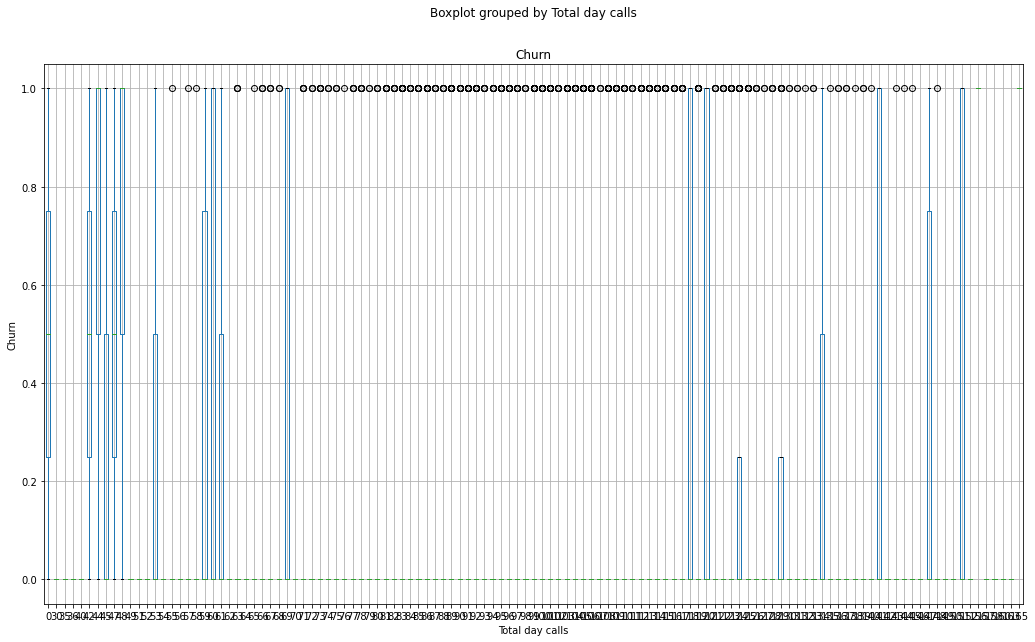

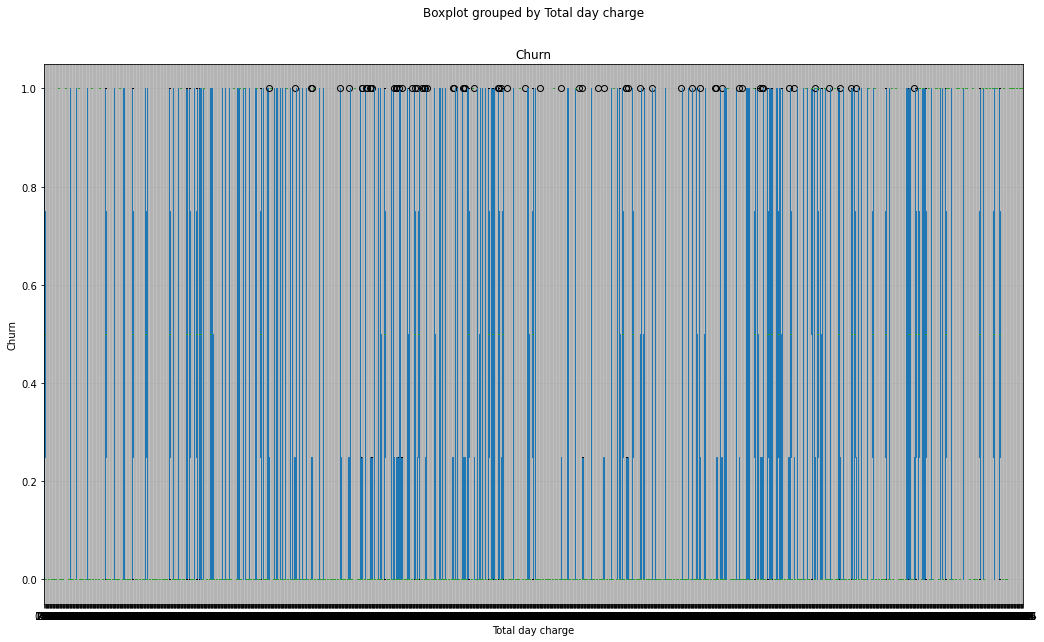

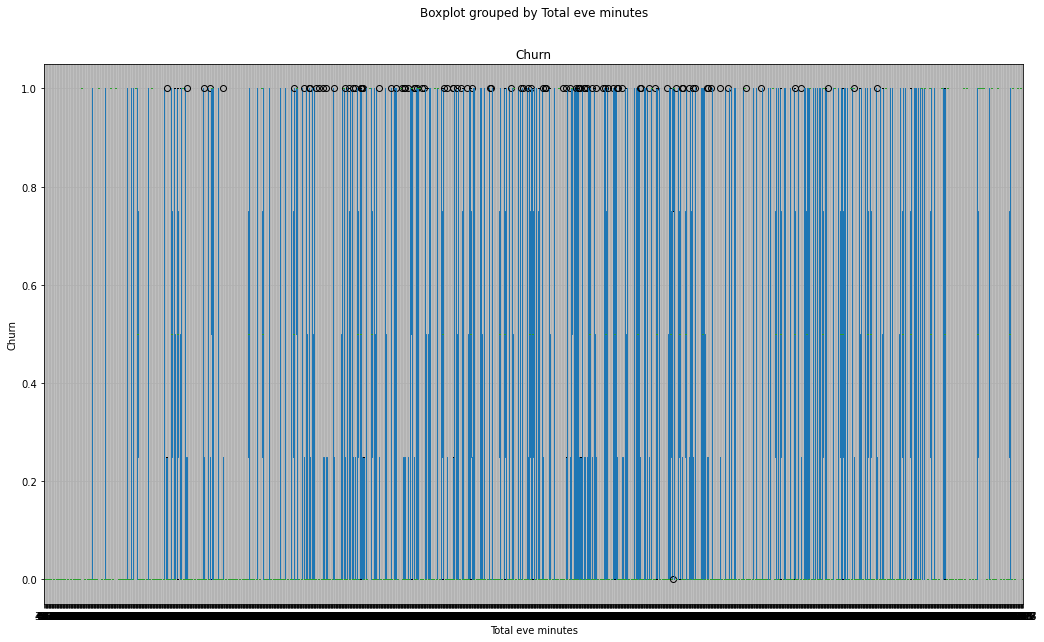

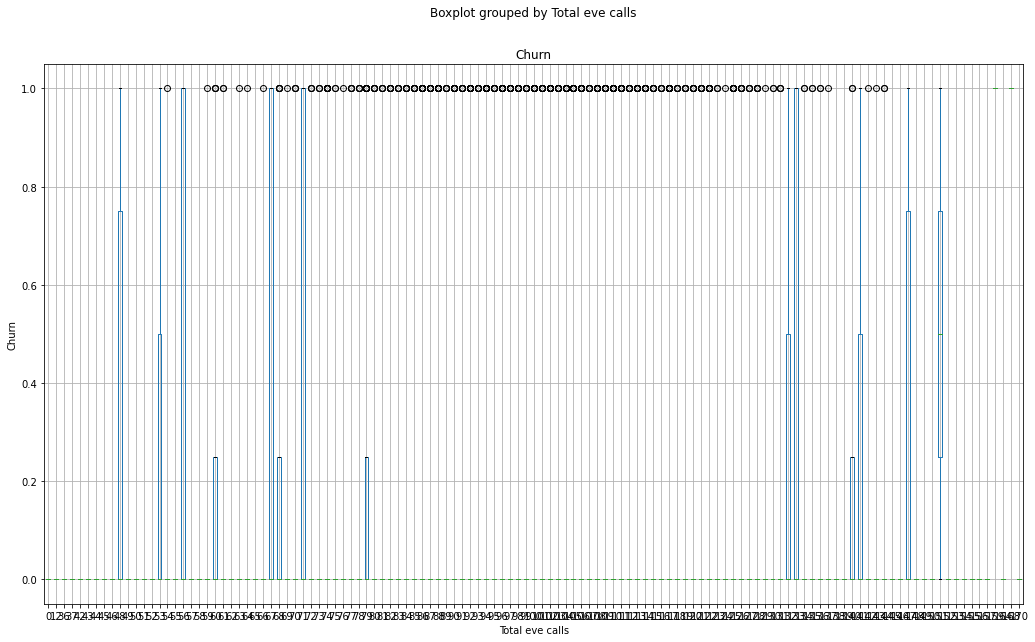

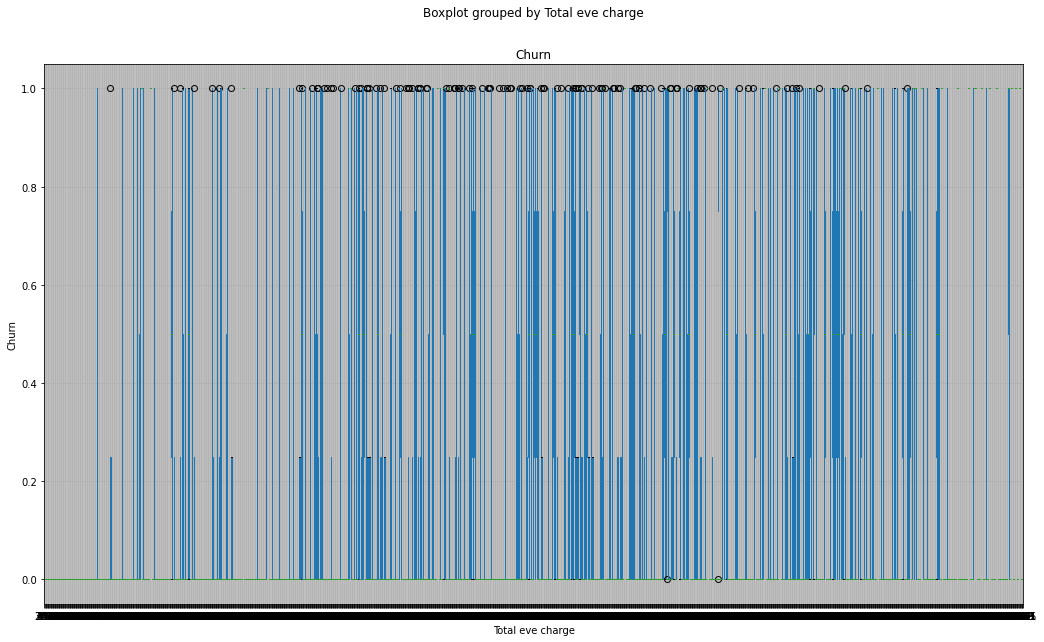

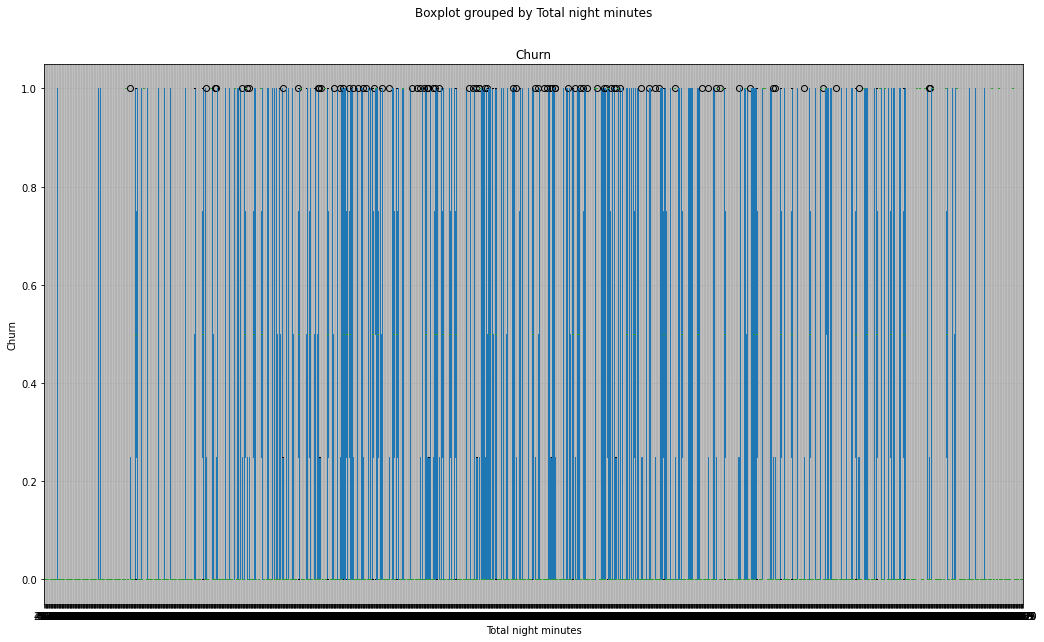

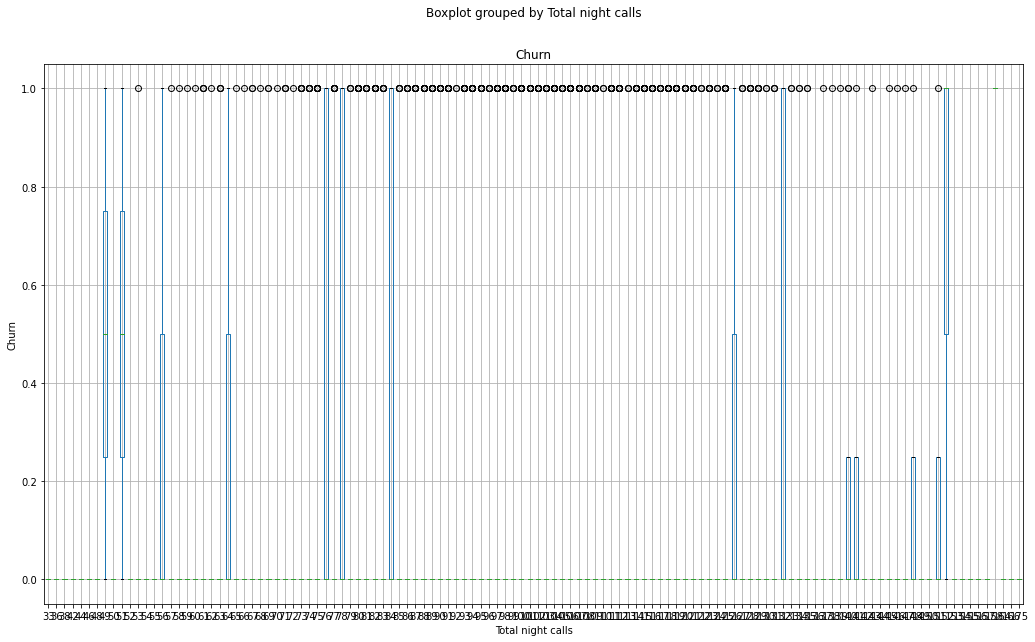

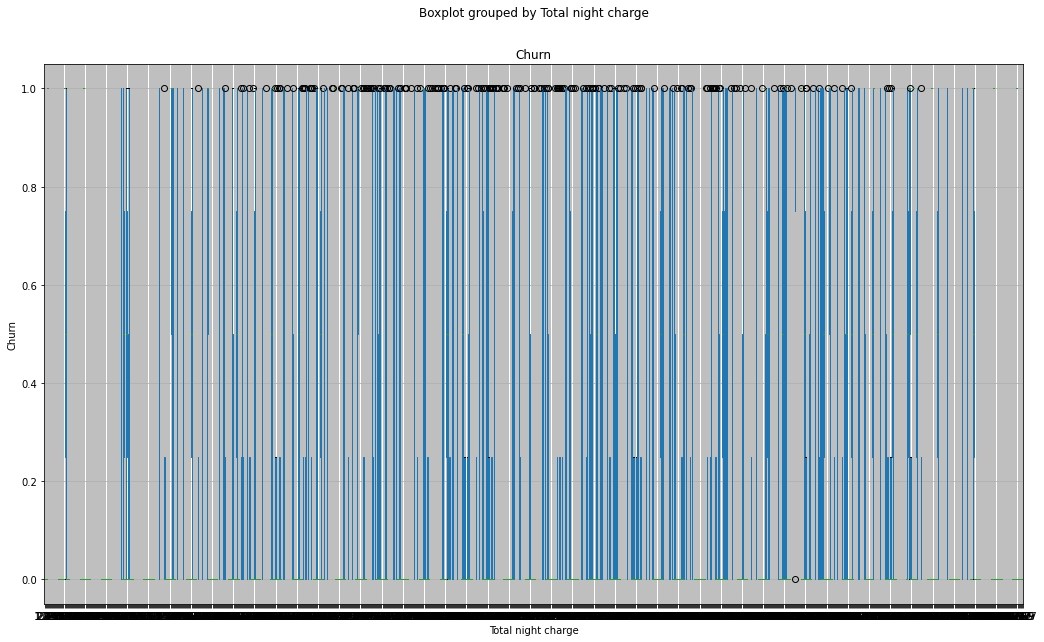

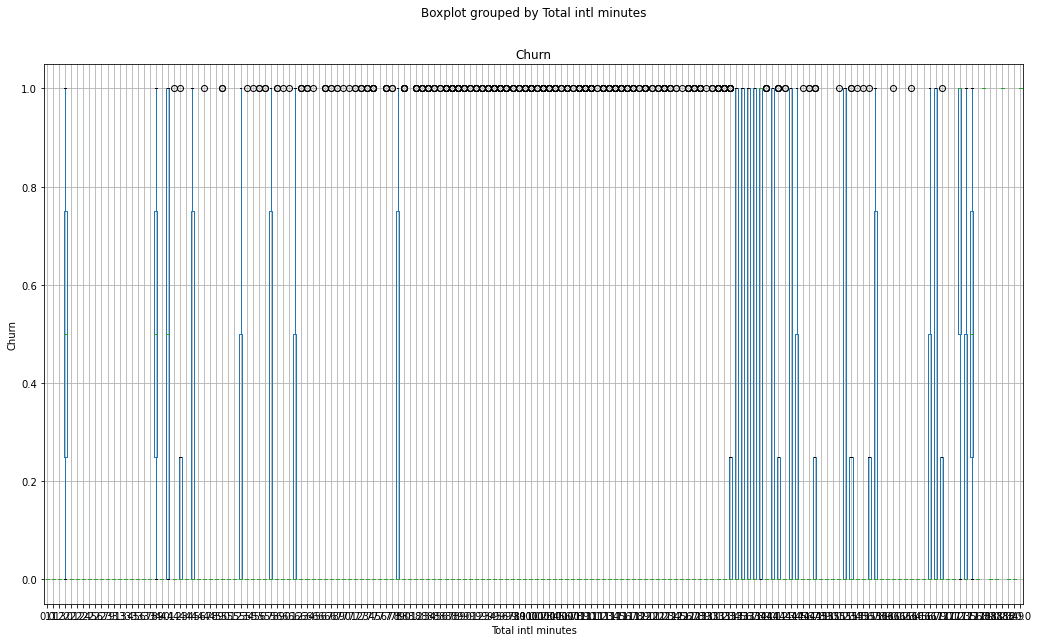

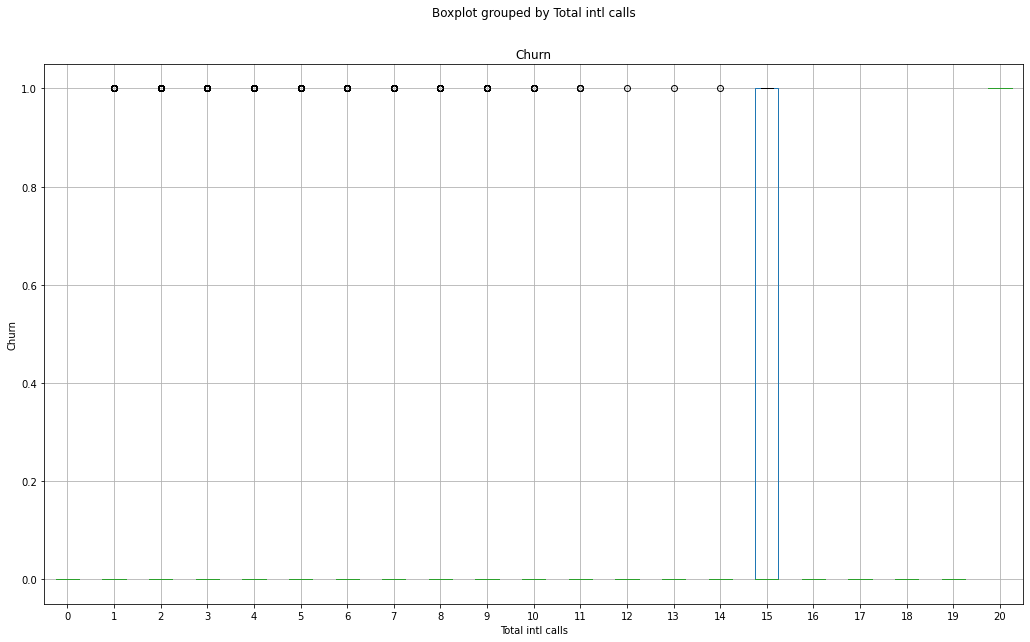

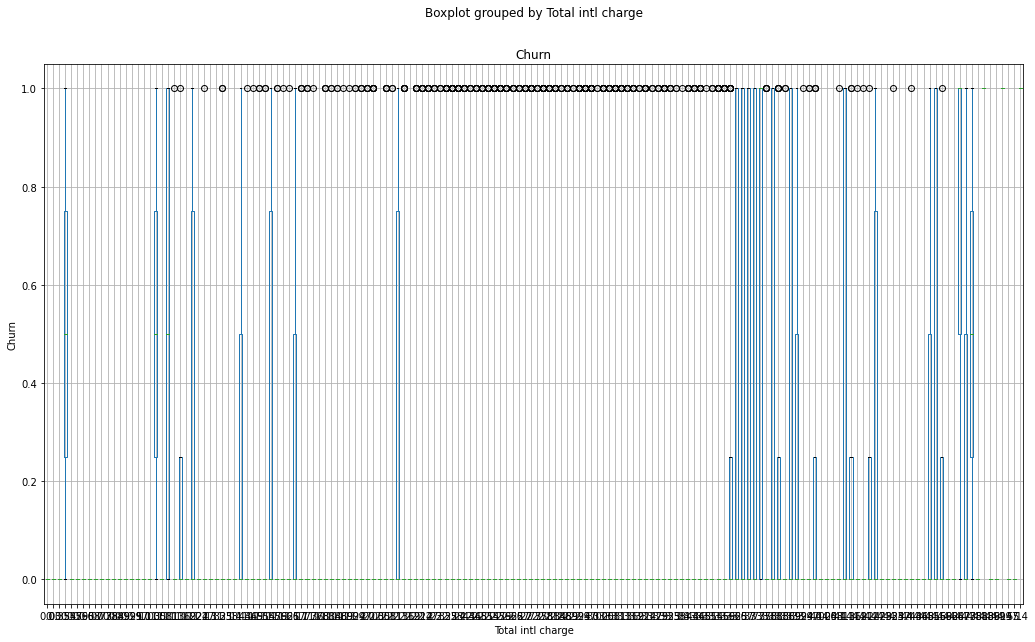

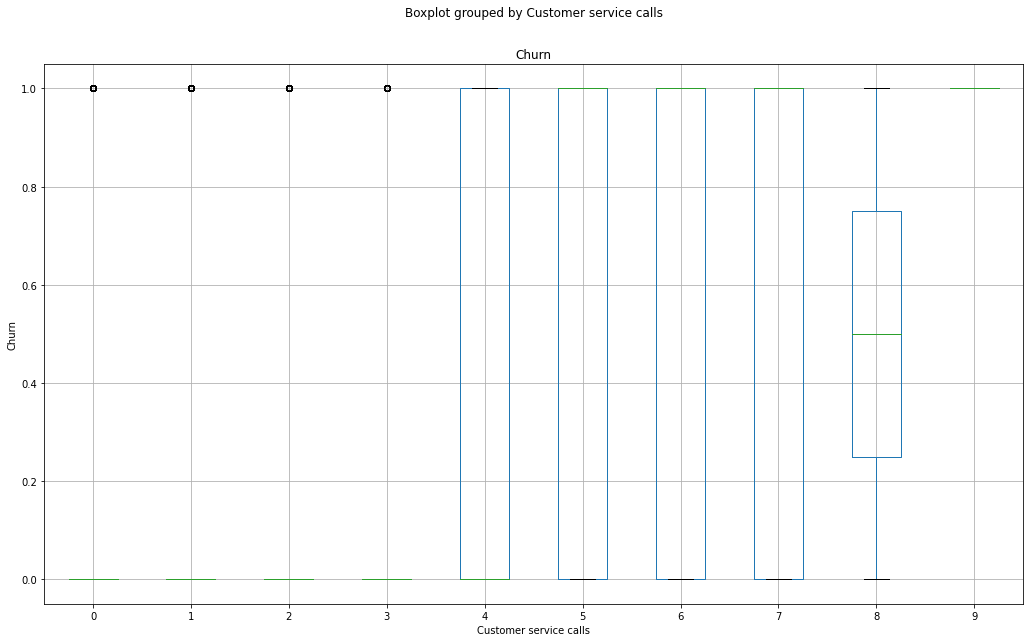

In [49]:
for col in df2:
  fig=plt.figure(figsize=(17,10))
  ax=fig.gca()
  #feature=telecom[col]
  #label=telecom['Churn']
  telecom.boxplot(column = 'Churn', by = col, ax = ax)
  plt.xlabel(col)
  plt.ylabel('Churn')
plt.show()

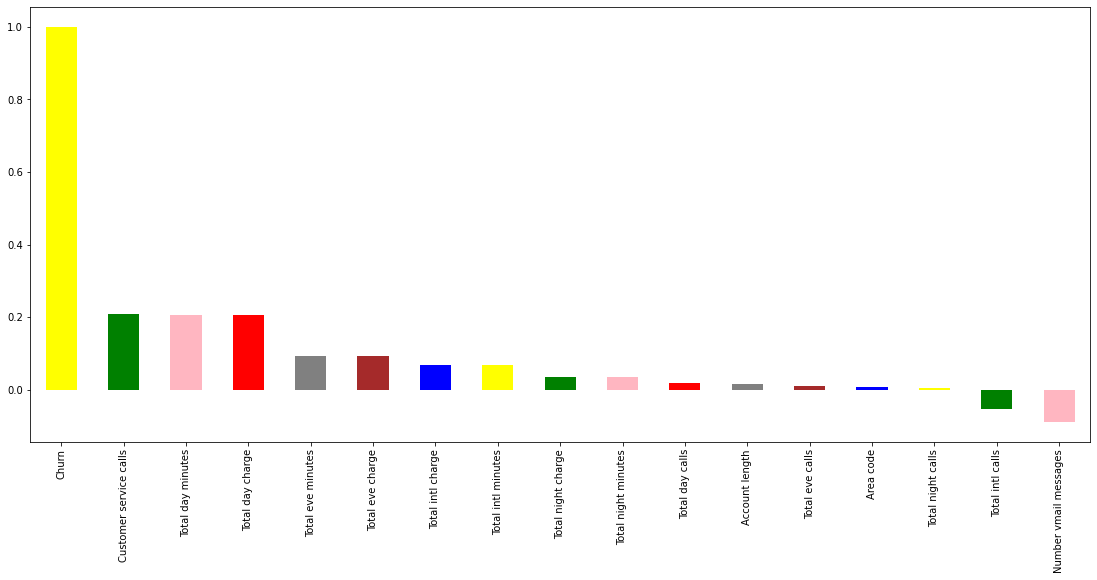

In [50]:
plt.figure(figsize=(19,8))
telecom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['yellow','green','lightpink','red','grey','brown','blue'])

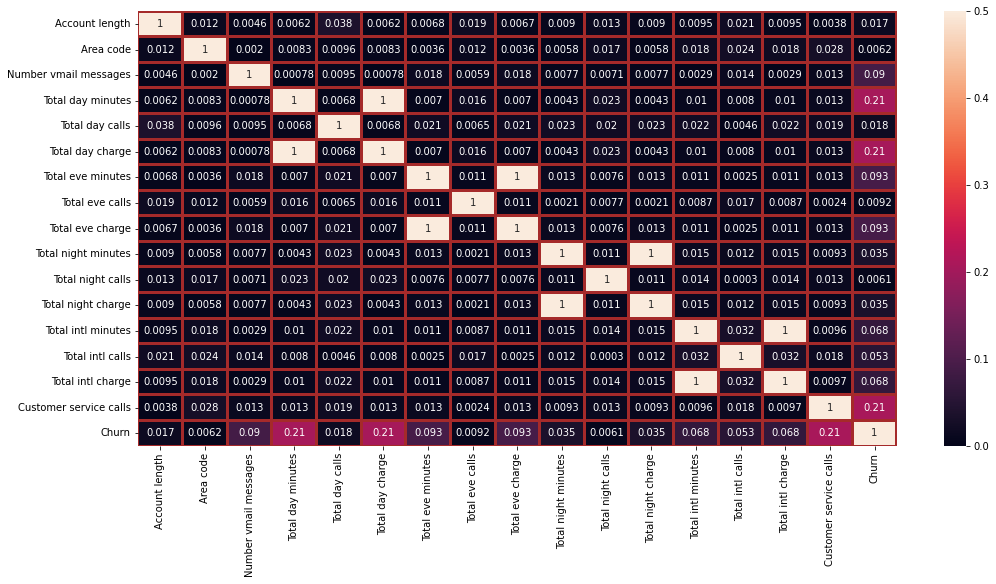

In [51]:
plt.figure(figsize=(17,8))
correlation=telecom.corr()
sns.heatmap(abs(correlation), annot = True, vmin=0, vmax=0.5, linewidths=2, linecolor='brown')

Text(0.5, 1.0, 'Correlation Heatmap')

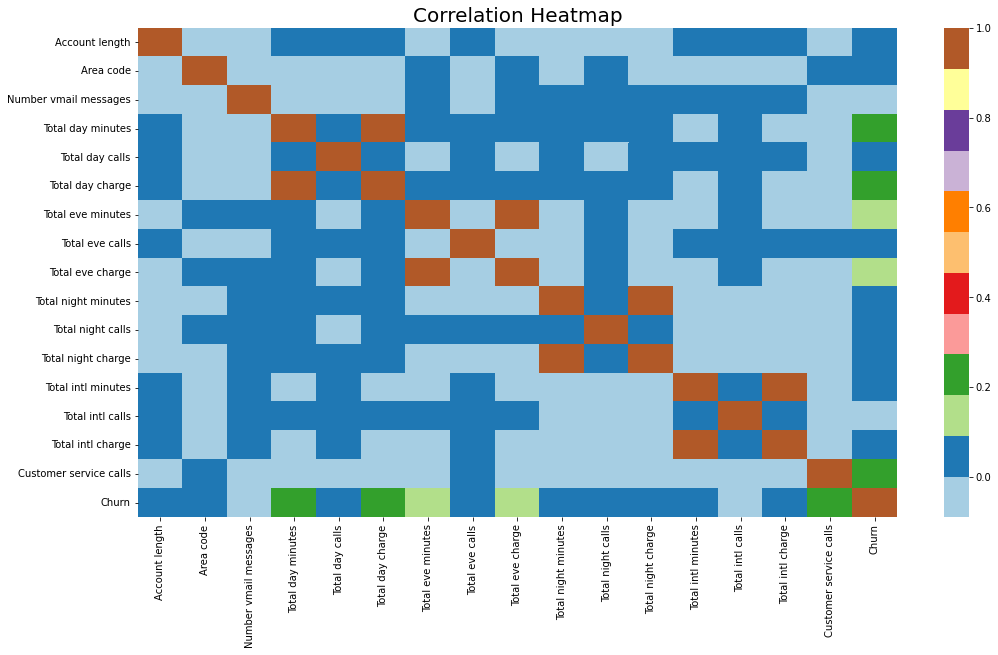

In [52]:

telecom['Churn'] = telecom['Churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(17,9))
sns.heatmap(telecom.corr(), cmap="Paired",annot=False)
plt.title("Correlation Heatmap", fontsize=20)


**Bivariate analysis between total day's minutes and churn based on number of customer service calls. The reason for taking total minutes of the day is because during the day the customers with the least call minutes are paying the highest and hence this can prove to be a factor for the customer.**

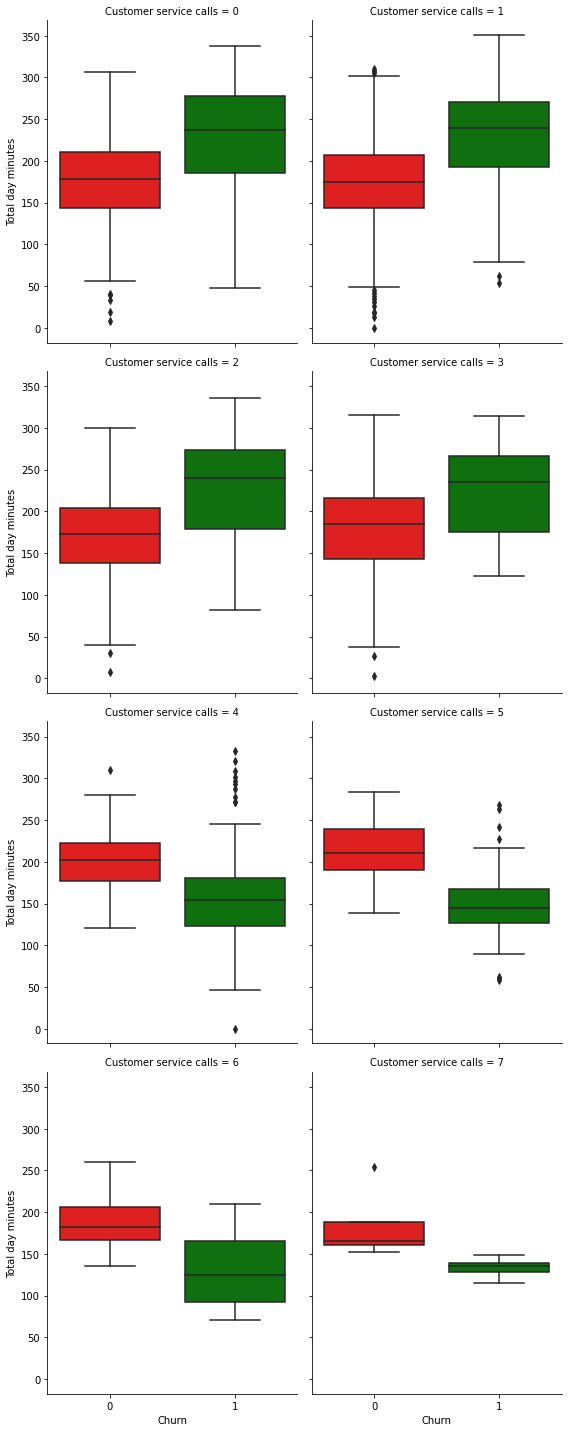

In [53]:
# Relation between customer service calls and Churn for various Customer service calls
sns.catplot(x='Churn', y = 'Total day minutes', col='Customer service calls',
data=telecom[telecom['Customer service calls'] < 8], kind = 'box', col_wrap=2, height=5, aspect=0.8,palette = ['r','g'])

Customer service calls and analysis between international plan users and non-users categorized by churn status

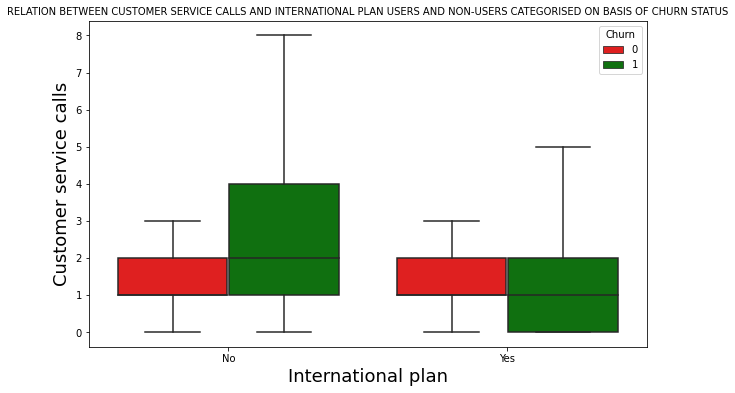

In [54]:
# Plotting a boxplot for the analysis
import seaborn as sns
sns.boxplot(x = 'International plan',
            y = 'Customer service calls',
            data = telecom,
            sym = "",                  
            hue = "Churn",
            palette = ['r','g']) 
plt.xlabel('International plan', fontsize=18)
plt.ylabel('Customer service calls', fontsize=18)
plt.title('RELATION BETWEEN CUSTOMER SERVICE CALLS AND INTERNATIONAL PLAN USERS AND NON-USERS CATEGORISED ON BASIS OF CHURN STATUS',fontsize=10)
plt.show()

**International plan between users and non-users; Called customers with no international plan are making a median of 2 customer service calls compared to subscribers with an international plan who are making a median of 1 customer service call.**